In [40]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

root_folder ="C:/Users/adity/OneDrive/Desktop/Sixth Semester/CE6018 Seismic Data Analytics/"

folder_path = root_folder+"Program/Week8/PBNN/EPSD plot/EPSD_Data/"
# Load the data
freqEnv_actual = pd.read_csv(folder_path+'FreqEnv/Actuals_epoch1000.csv')
freqEnv_prediction = pd.read_csv(
    folder_path+'FreqEnv/Predictions_epoch1000.csv')


timeEnv_actual = pd.read_csv(folder_path+'TimeEnv/Actuals_epoch1000.csv')
timeEnv_prediction = pd.read_csv(
    folder_path+'TimeEnv/Predictions_epoch1000.csv')
print(freqEnv_actual.shape)
print(freqEnv_prediction.shape)
print(timeEnv_actual.shape)
print(timeEnv_prediction.shape)

(2791, 259)
(2791, 259)
(2360, 229)
(2360, 229)


In [41]:
# taking only the common RSN in both the actual and predicted data
RSN_FreqEnv_actual = list(freqEnv_actual["RSN"])
RSN_TimeEnv_actual = list(timeEnv_actual["RSN"])

# Taking the common RSN in both the actual and predicted data
common_RSN = list(set(RSN_FreqEnv_actual).intersection(
    set(RSN_TimeEnv_actual)))

freqEnv_actual = freqEnv_actual[freqEnv_actual["RSN"].isin(common_RSN)]
freqEnv_prediction = freqEnv_prediction[freqEnv_prediction["RSN"].isin(
    common_RSN)]
timeEnv_actual = timeEnv_actual[timeEnv_actual["RSN"].isin(common_RSN)]
timeEnv_prediction = timeEnv_prediction[timeEnv_prediction["RSN"].isin(
    common_RSN)]

In [42]:
# shorting the data based on RSN
freqEnv_actual = freqEnv_actual.sort_values(by=['RSN'])
freqEnv_prediction = freqEnv_prediction.sort_values(by=['RSN'])
timeEnv_actual = timeEnv_actual.sort_values(by=['RSN'])
timeEnv_prediction = timeEnv_prediction.sort_values(by=['RSN'])


# setting the RSN as index
freqEnv_actual = freqEnv_actual.set_index('RSN')
freqEnv_prediction = freqEnv_prediction.set_index('RSN')
timeEnv_actual = timeEnv_actual.set_index('RSN')
timeEnv_prediction = timeEnv_prediction.set_index('RSN')

In [43]:
Total_RSN = list(freqEnv_actual.index)

req_no = 100
# row_no = Total_RSN[:req_no]
row_no = [881.0, 1213.0, 1239.0, 1366.0, 1269.0, 1385.0,
          1551.0, 1578.0, 1592.0, 2212.0, 2735.0, 3179.0, 4540.0]

actual_matrix = []
prediction_matrix = []
residuals_matrix = []
freqEnv_actual_row = []
freqEnv_prediction_row = []
timeEnv_actual_row = []
timeEnv_prediction_row = []

for i in range(len(row_no)):
    freqEnv_actual_row0 = freqEnv_actual.loc[row_no[i]][8:]
    freqEnv_actual_row.append(list(freqEnv_actual_row0.apply(lambda x: 10**x)))
    freqEnv_prediction_row0 = freqEnv_prediction.loc[row_no[i]][8:]
    freqEnv_prediction_row.append(
        list(freqEnv_prediction_row0.apply(lambda x: 10**x)))
    timeEnv_actual_row0 = timeEnv_actual.loc[row_no[i]][8:]
    timeEnv_actual_row.append(list(timeEnv_actual_row0.apply(lambda x: 10**x)))
    timeEnv_prediction_row0 = timeEnv_prediction.loc[row_no[i]][8:]
    timeEnv_prediction_row.append(
        list(timeEnv_prediction_row0.apply(lambda x: 10**x)))
    actual = np.outer(timeEnv_actual_row[i], freqEnv_actual_row[i])
    prediction = np.outer(timeEnv_prediction_row[i], freqEnv_prediction_row[i])
    actual_matrix.append(actual)
    prediction_matrix.append(prediction)
    residuals_matrix.append(prediction - actual)

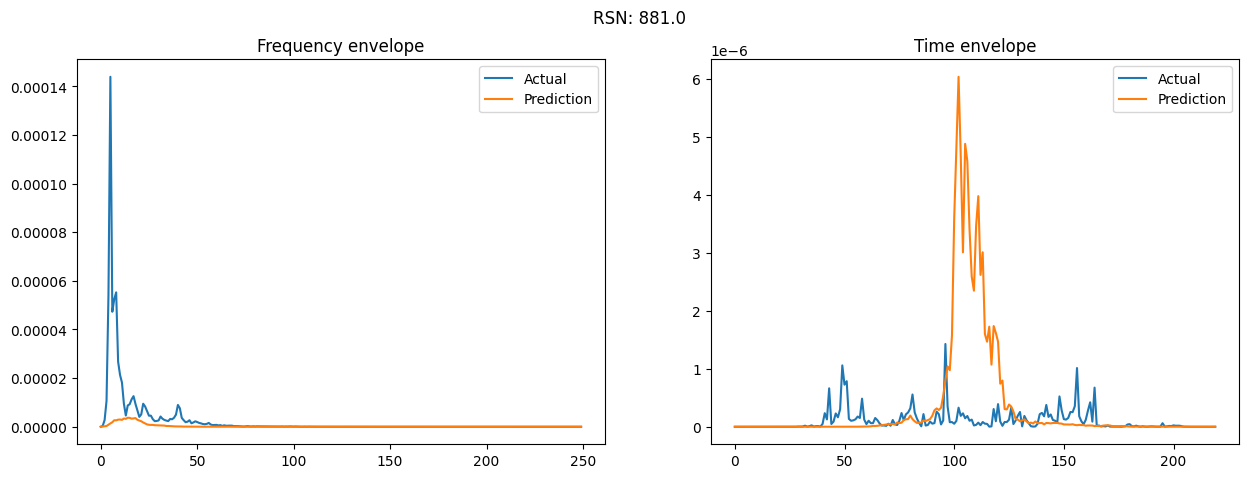

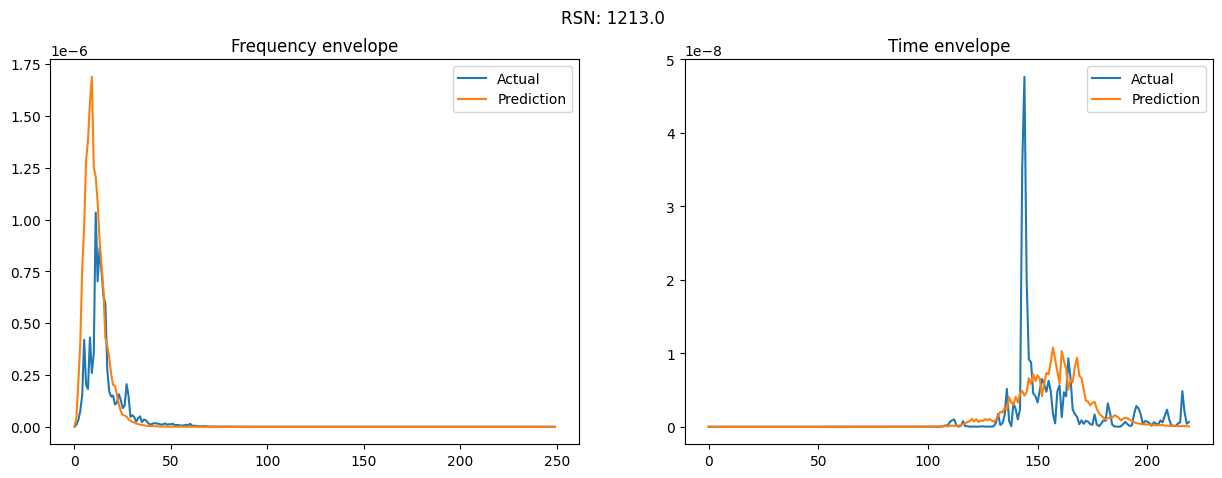

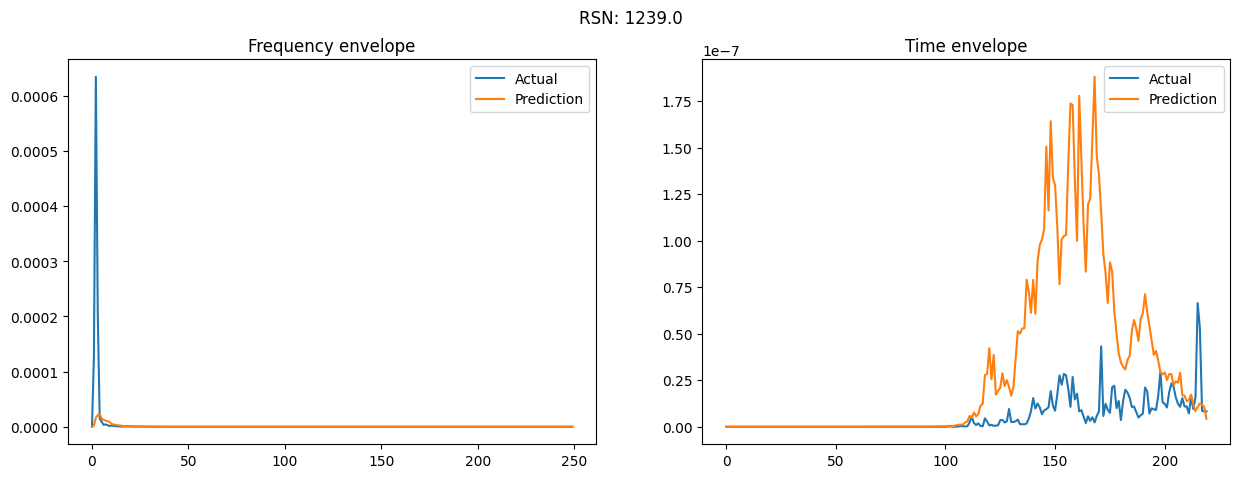

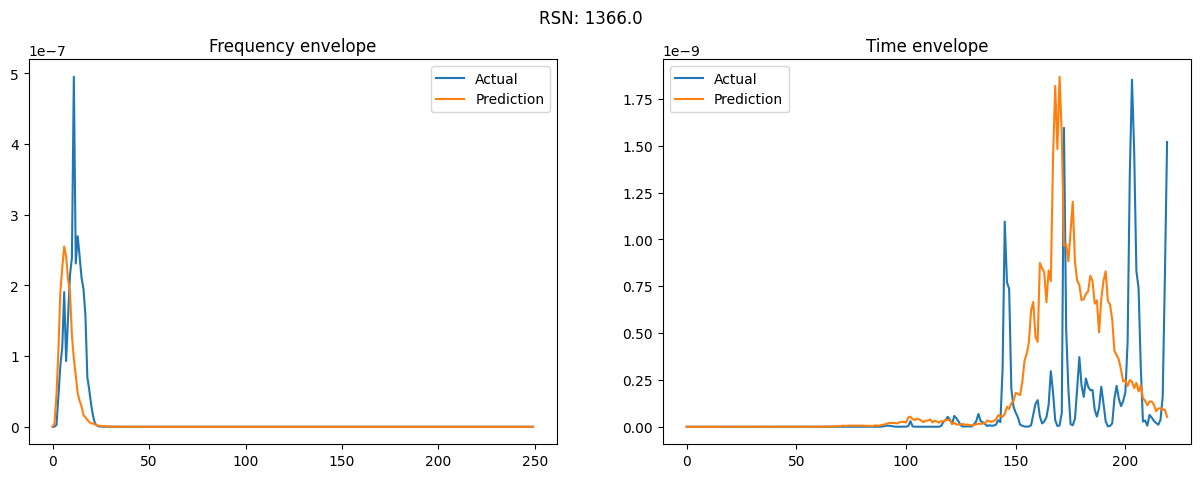

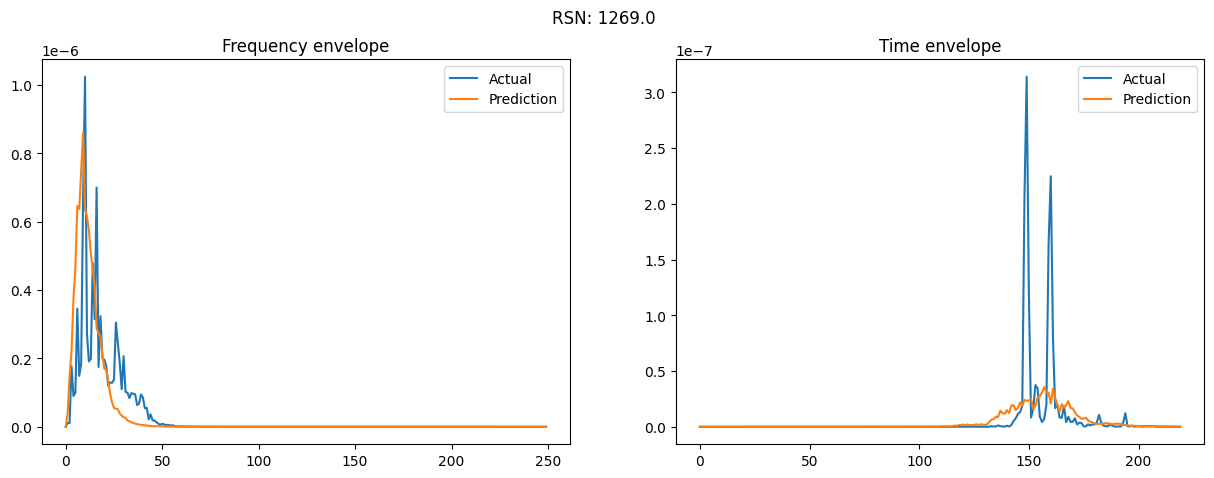

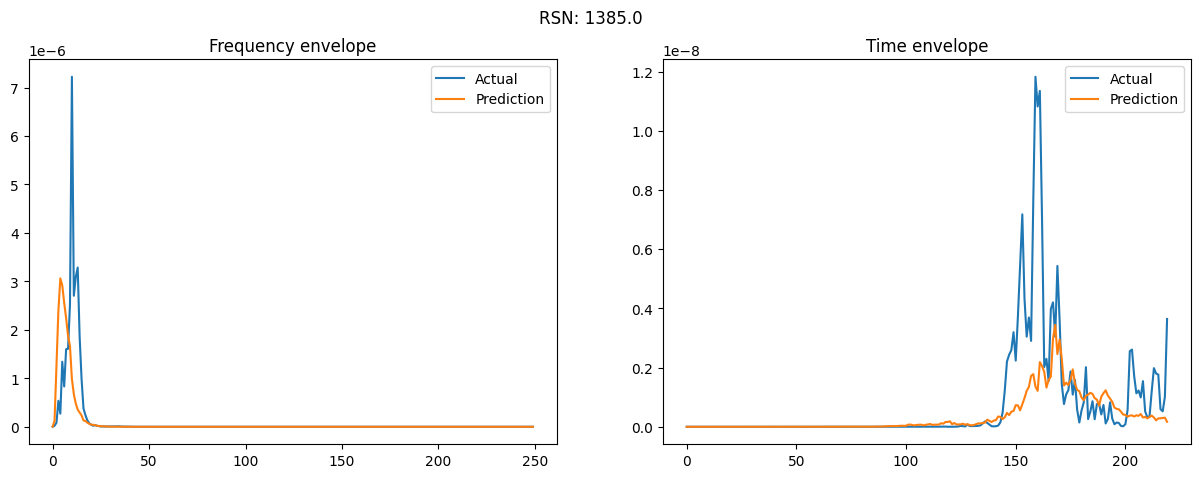

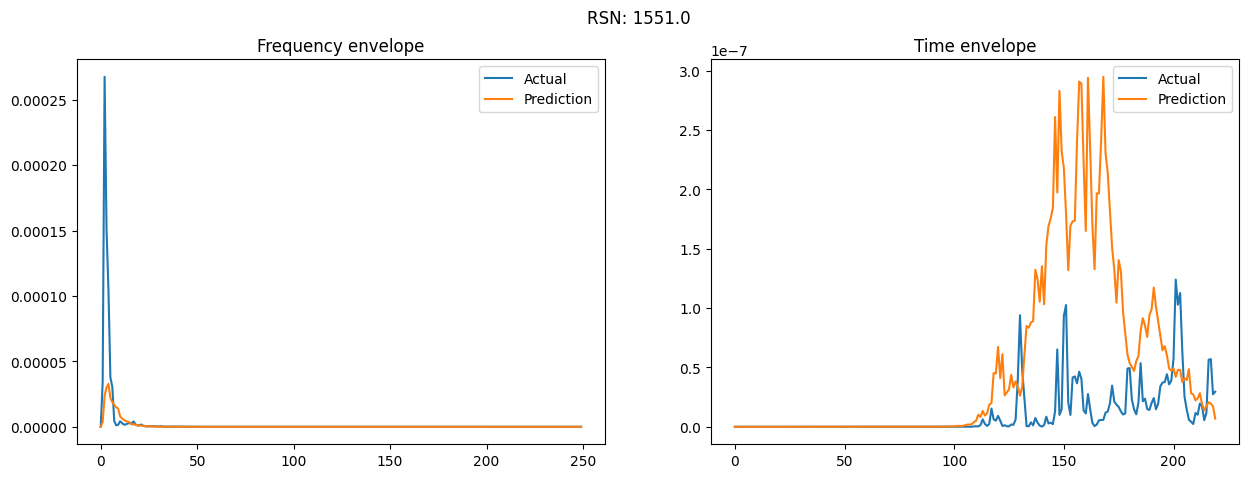

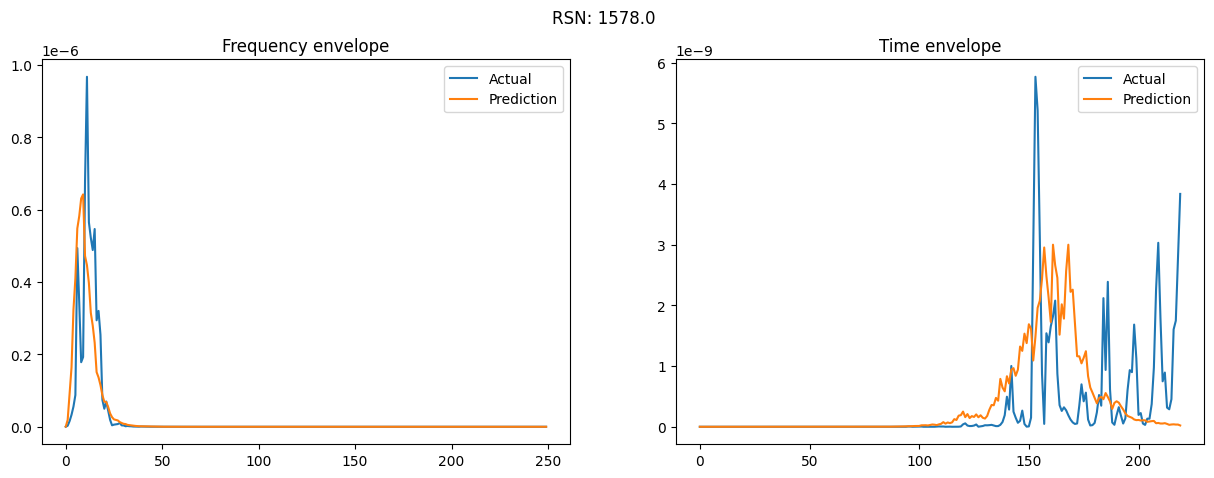

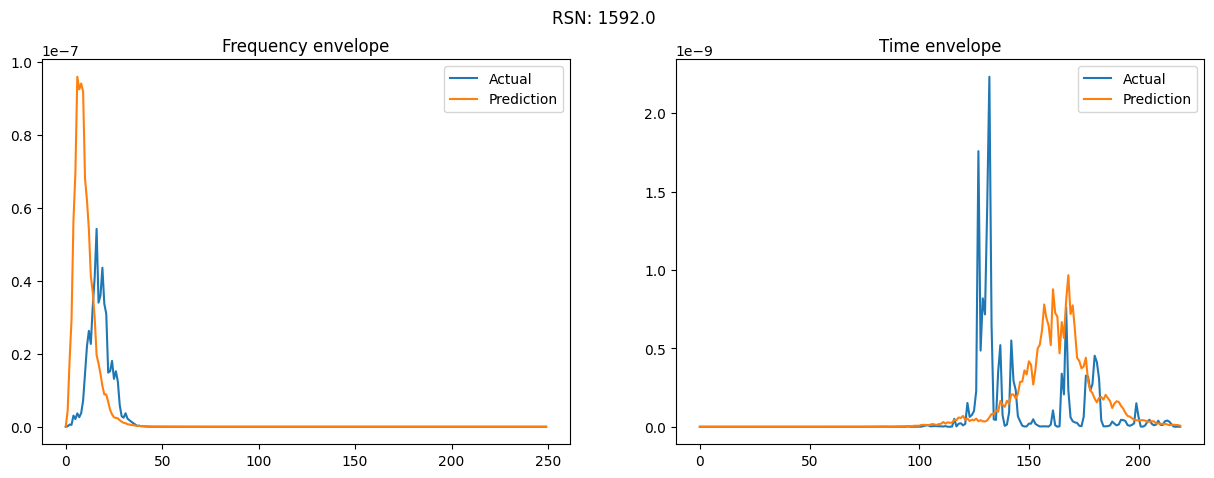

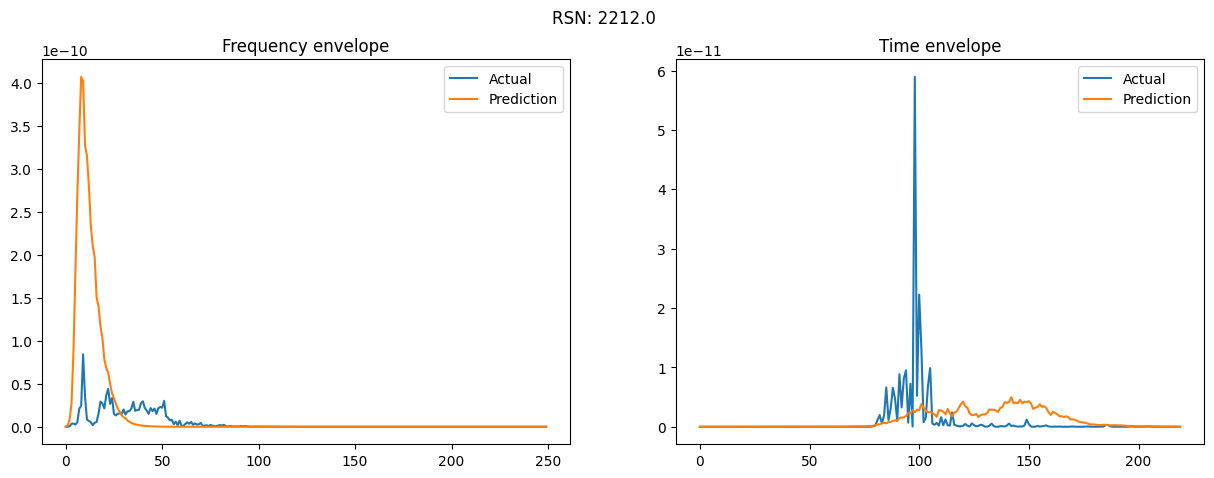

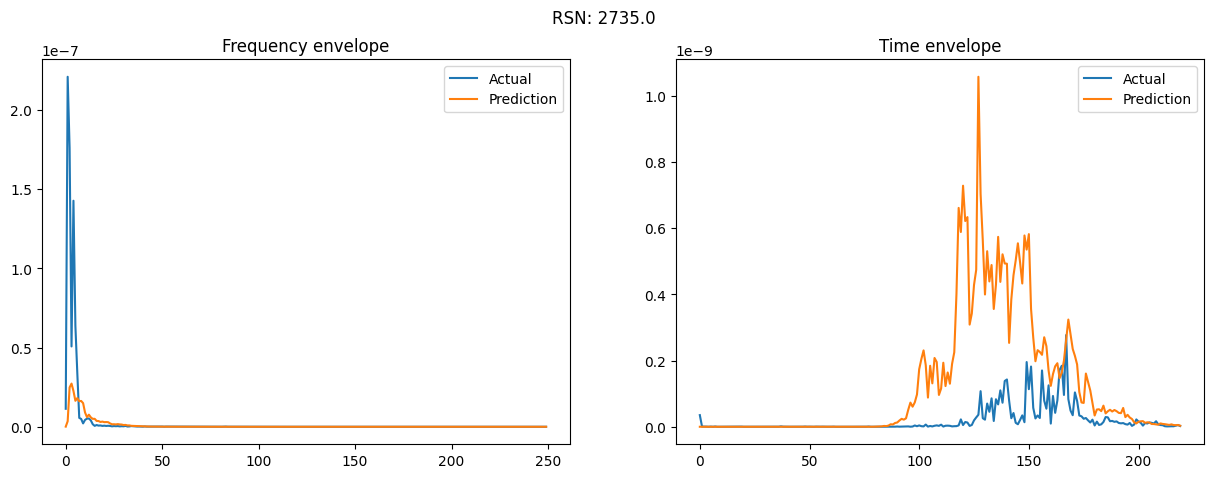

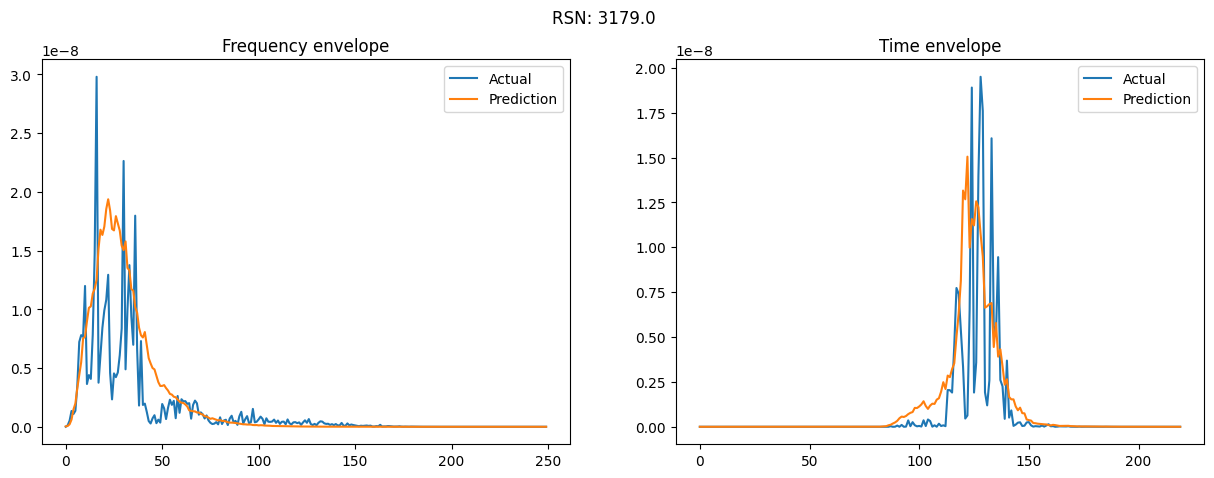

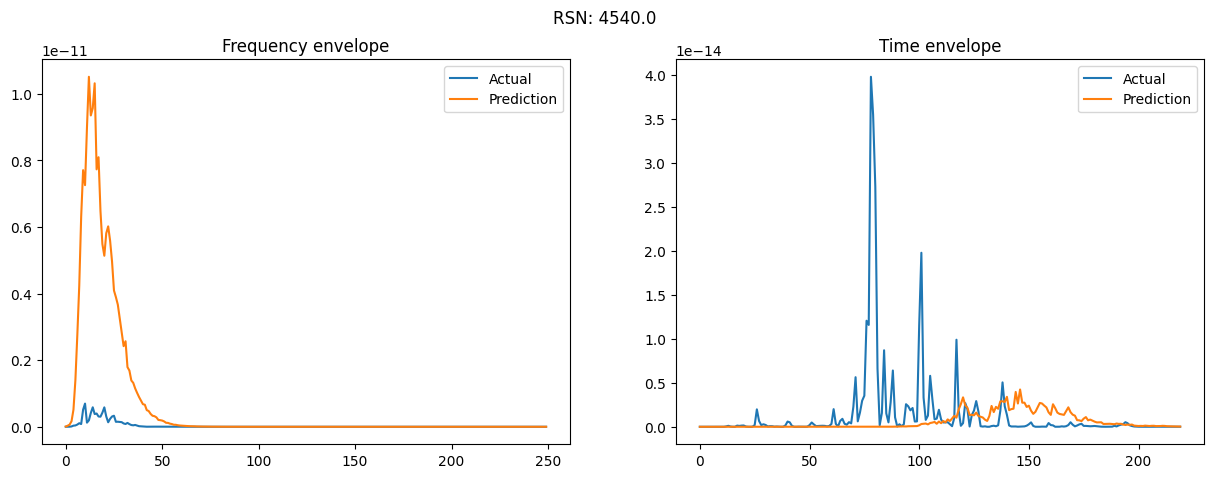

In [44]:
# plotting the actual and predicted  of freq and time data
for i in range(len(row_no)):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    # freqEnv_actual_row = freqEnv_actual.loc[row_no[i]][8:]
    # freqEnv_actual_row = freqEnv_actual_row.apply(lambda x: 10**x)
    # freqEnv_prediction_row = freqEnv_prediction.loc[row_no[i]][8:]
    # freqEnv_prediction_row = freqEnv_prediction_row.apply(lambda x: 10**x)
    # timeEnv_actual_row = timeEnv_actual.loc[row_no[i]][8:]
    # timeEnv_actual_row = timeEnv_actual_row.apply(lambda x: 10**x)
    # timeEnv_prediction_row = timeEnv_prediction.loc[row_no[i]][8:]
    # timeEnv_prediction_row = timeEnv_prediction_row.apply(lambda x: 10**x)
    axs[0].plot(freqEnv_actual_row[i], label='Actual')
    axs[0].plot(freqEnv_prediction_row[i], label='Prediction')
    axs[0].set_title('Frequency envelope')
    axs[0].legend()
    axs[1].plot(timeEnv_actual_row[i], label='Actual')
    axs[1].plot(timeEnv_prediction_row[i], label='Prediction')
    axs[1].set_title('Time envelope')
    axs[1].legend()
    plt.suptitle('RSN: '+str(row_no[i]))
    plt.show()

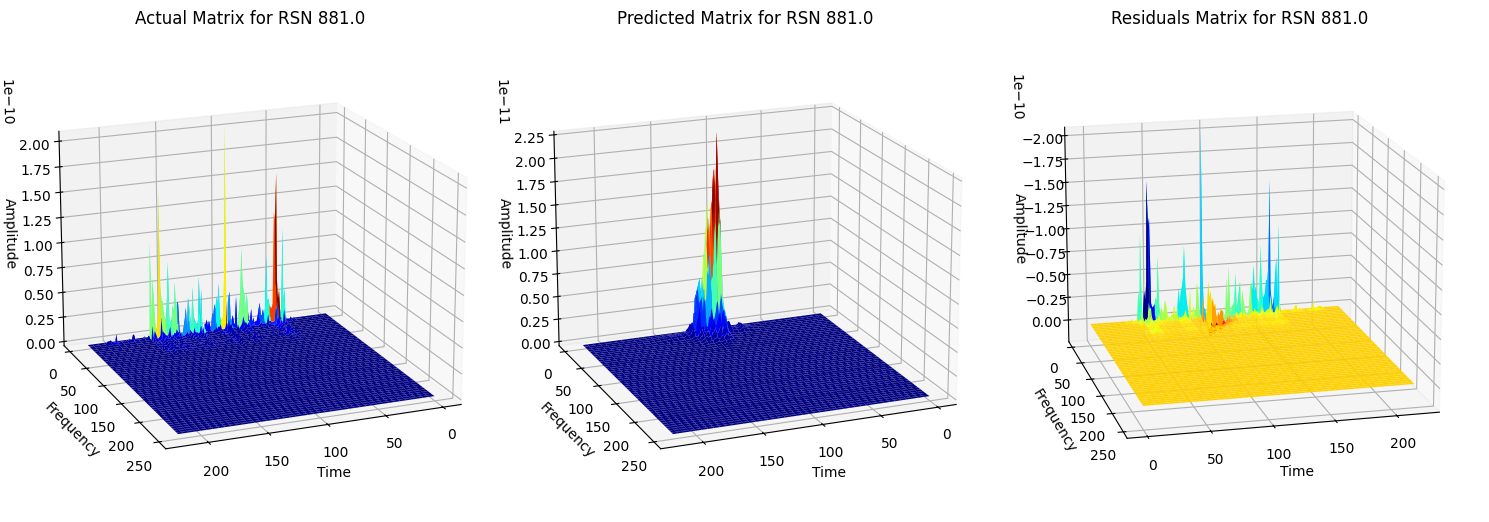

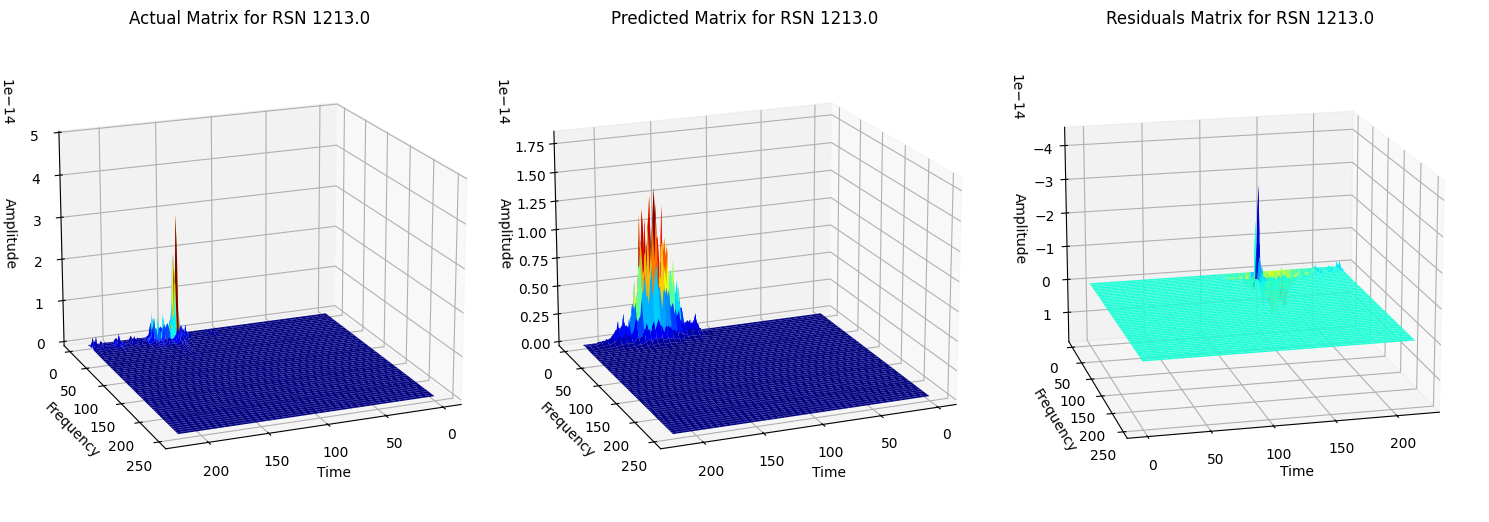

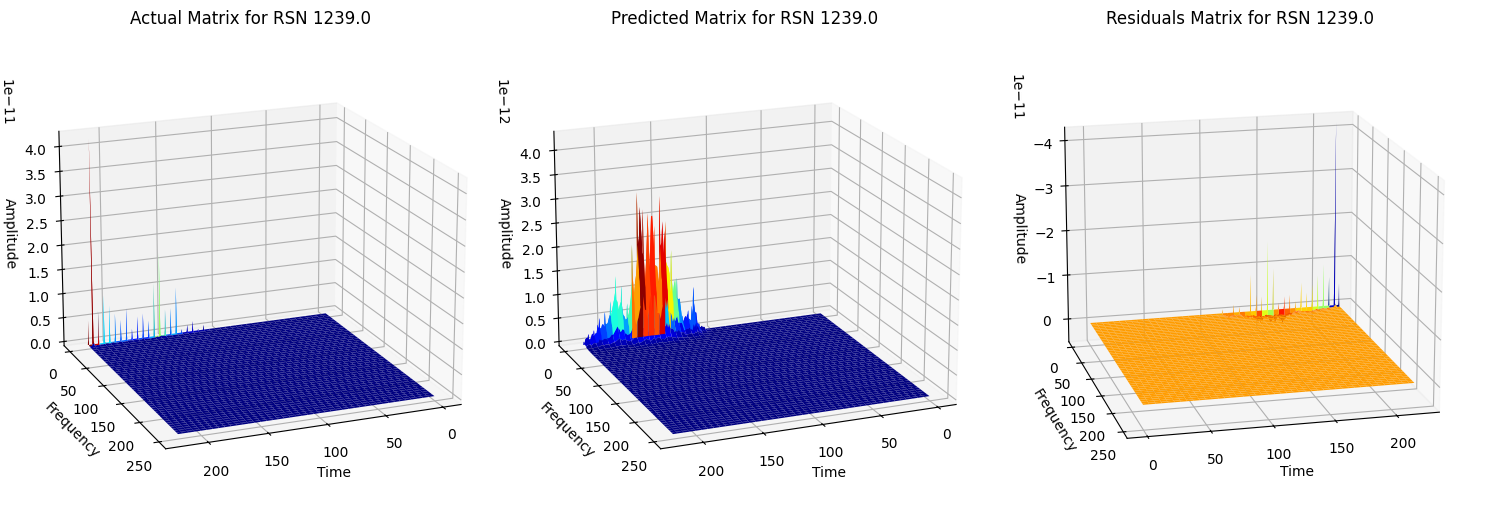

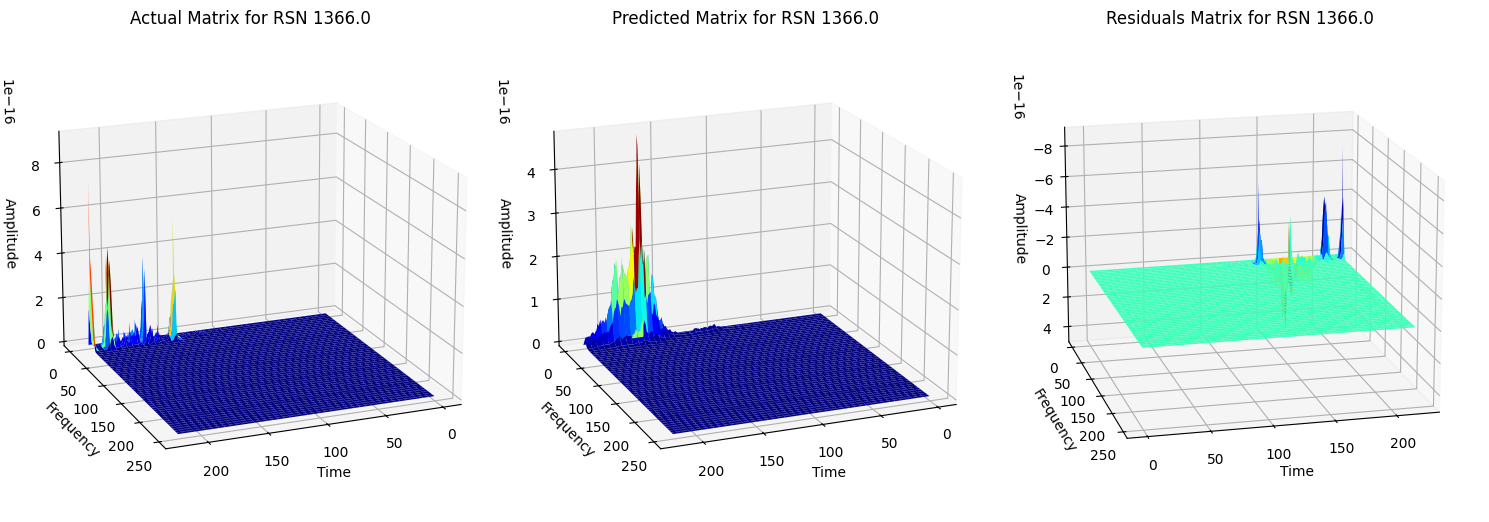

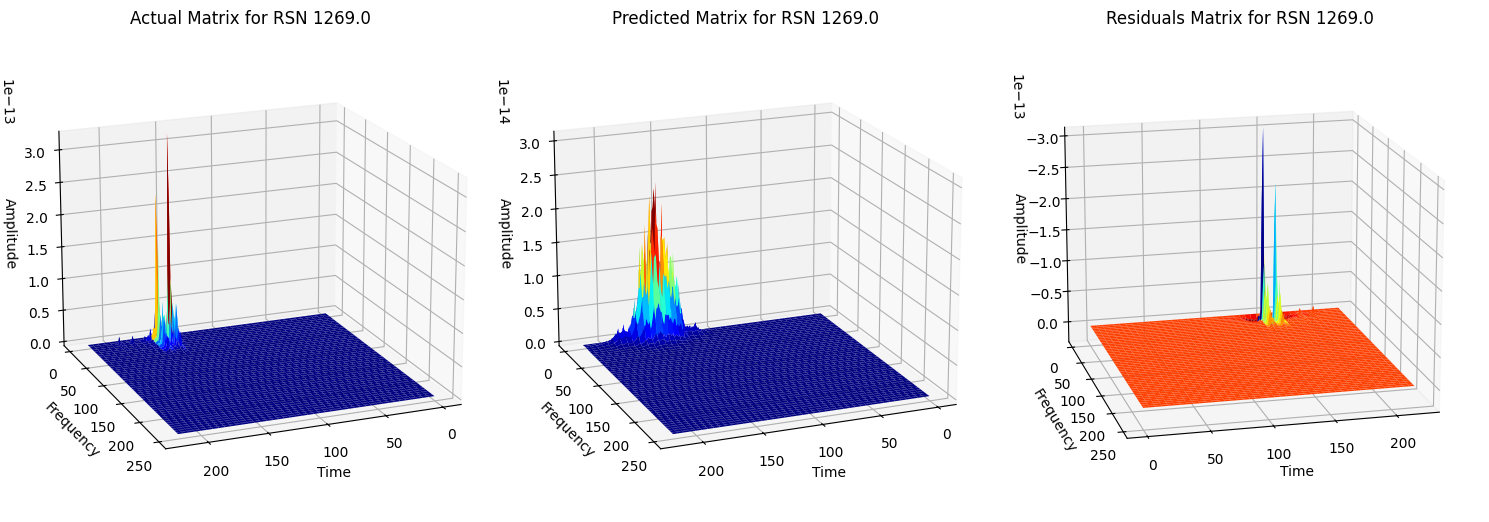

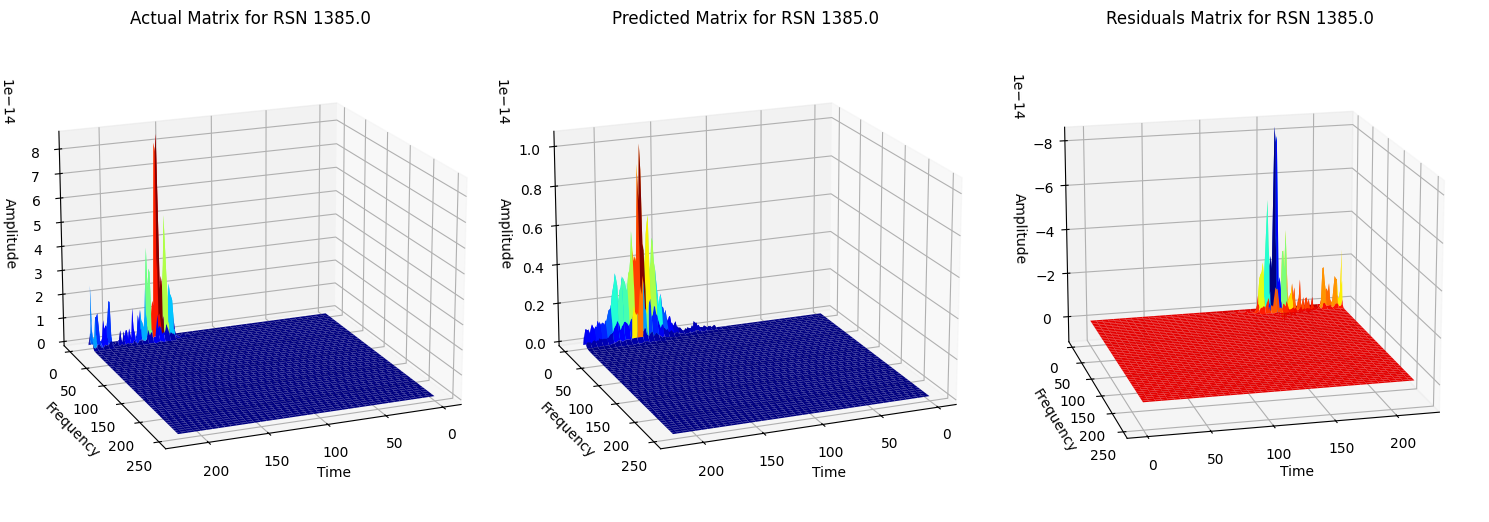

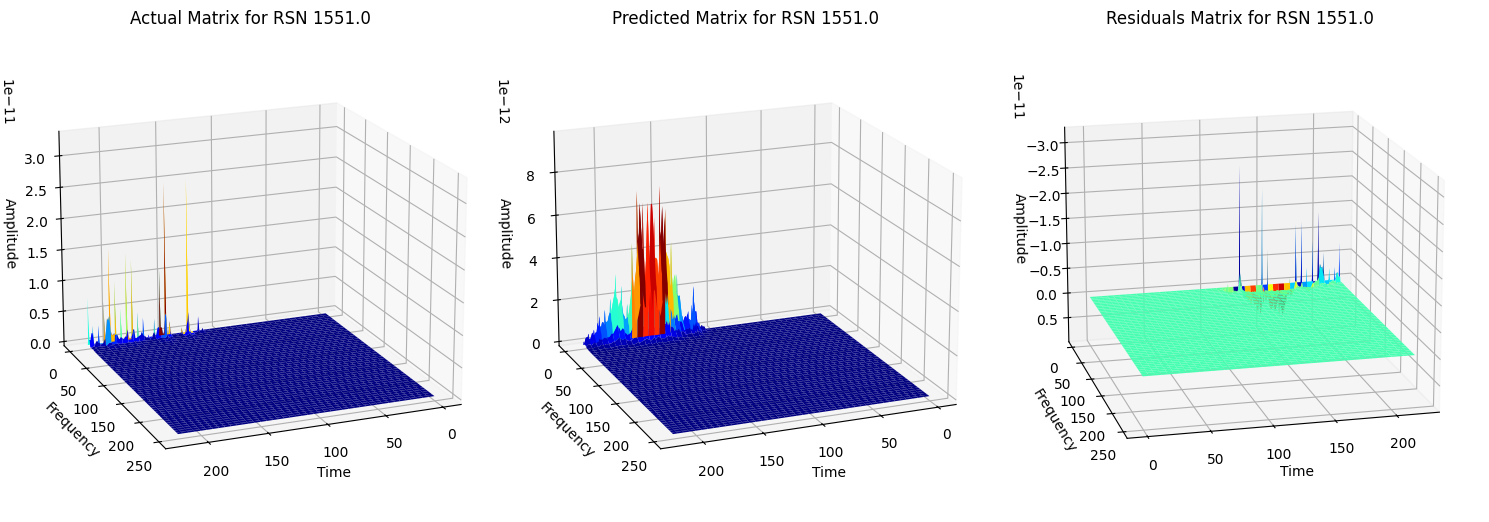

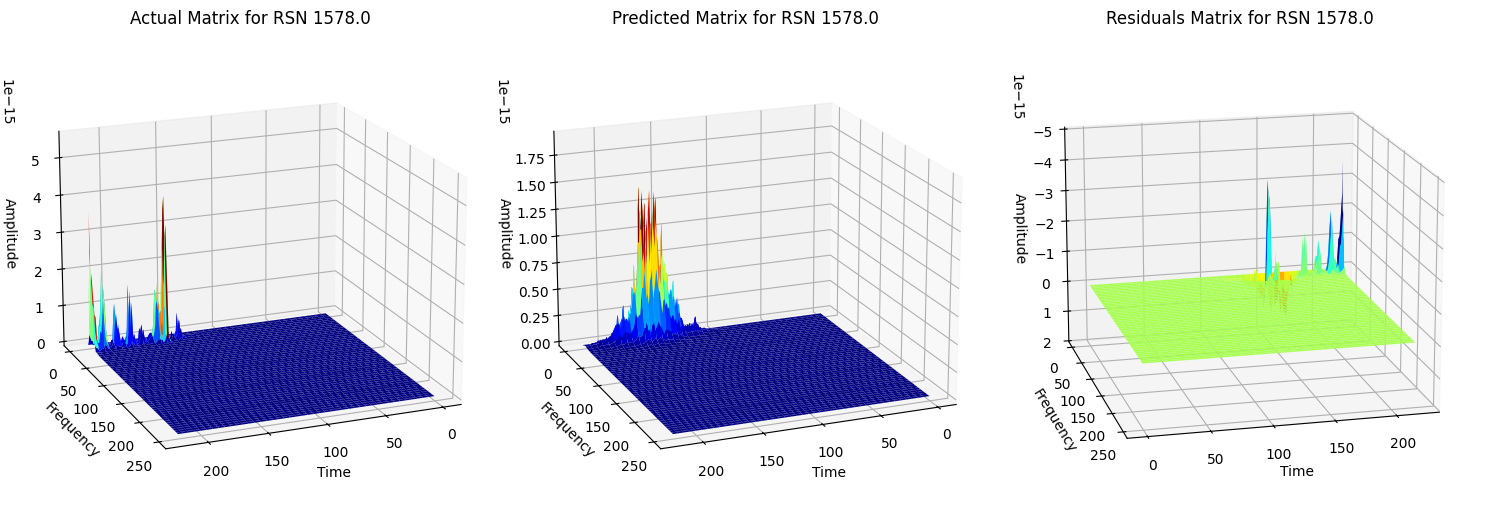

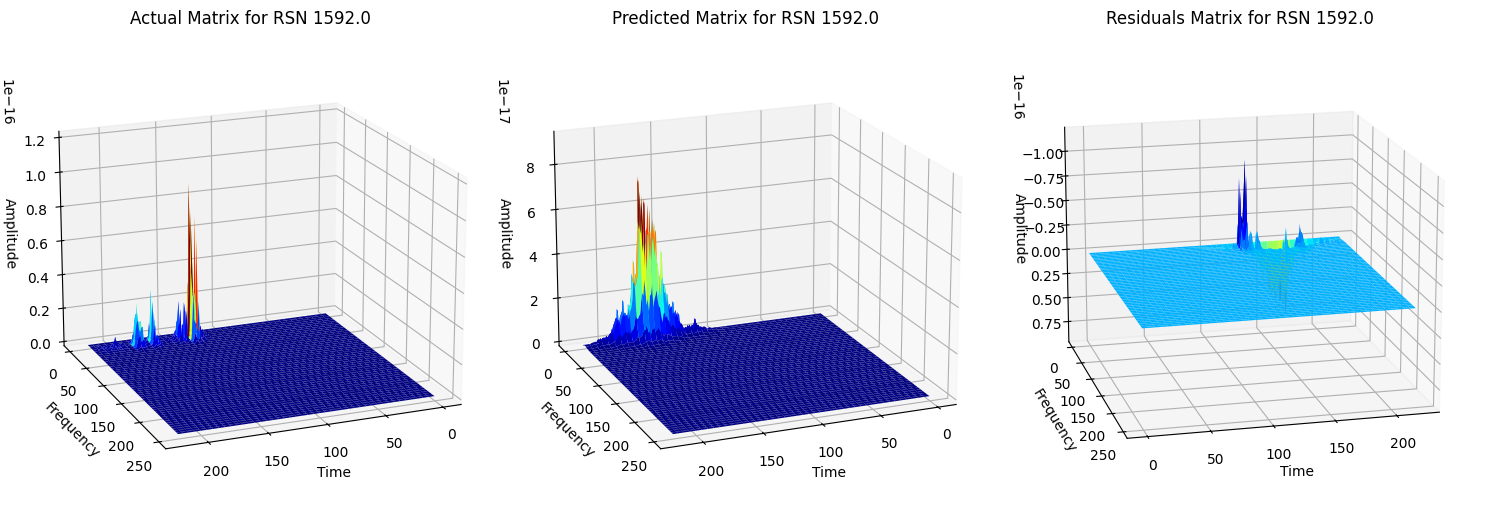

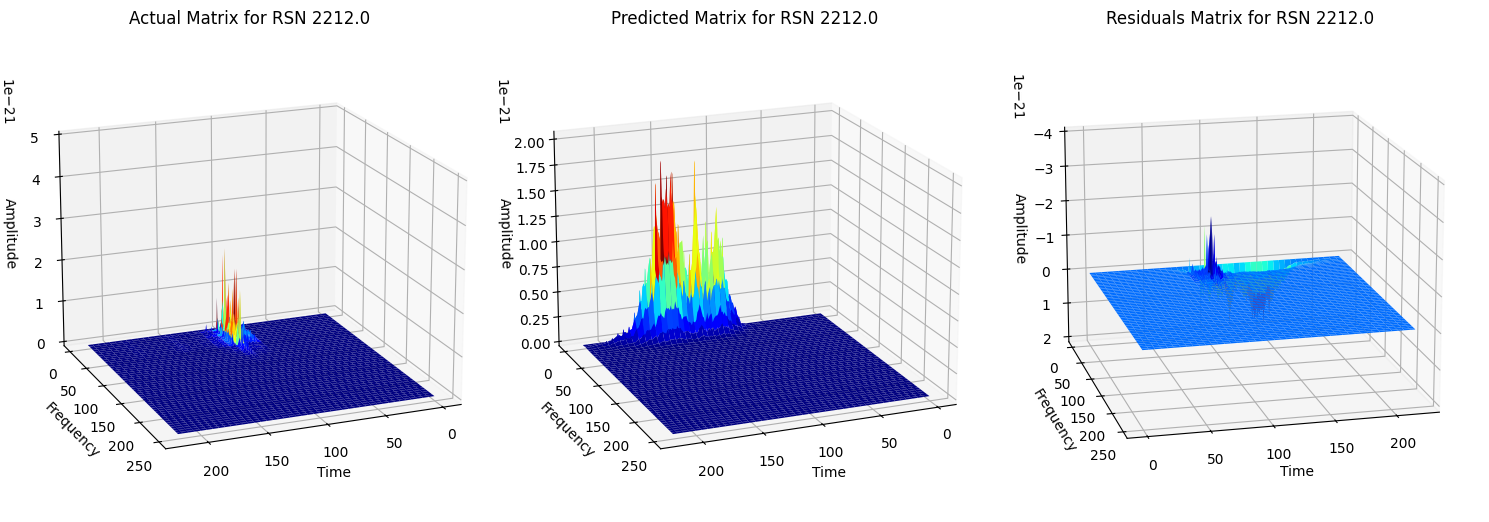

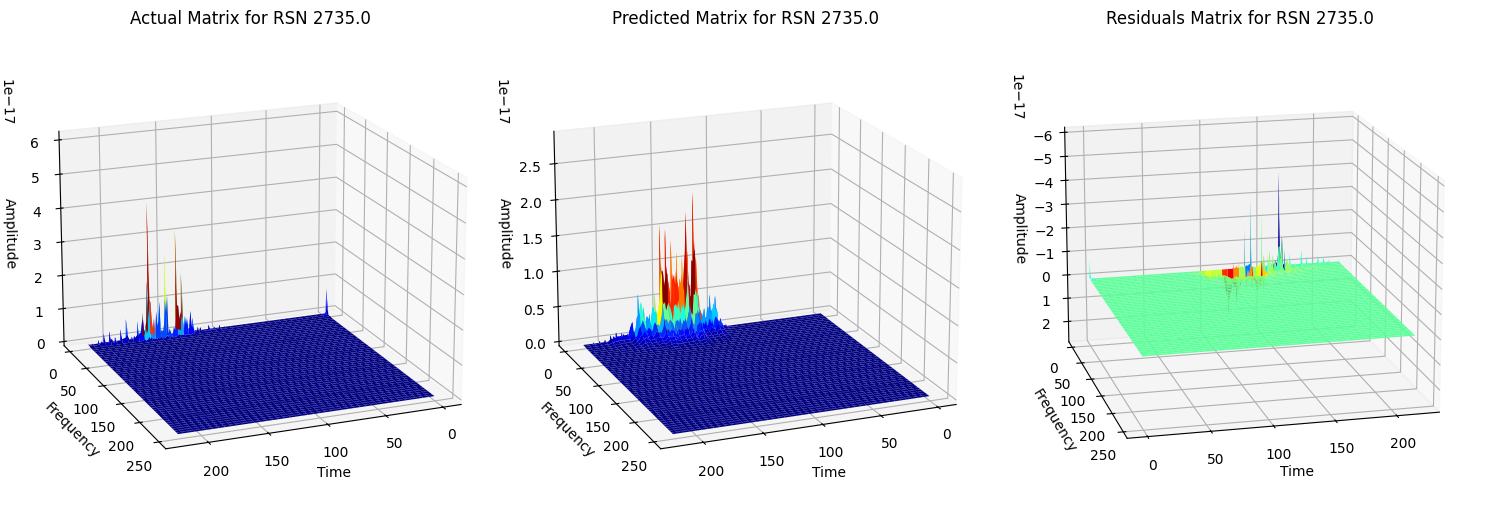

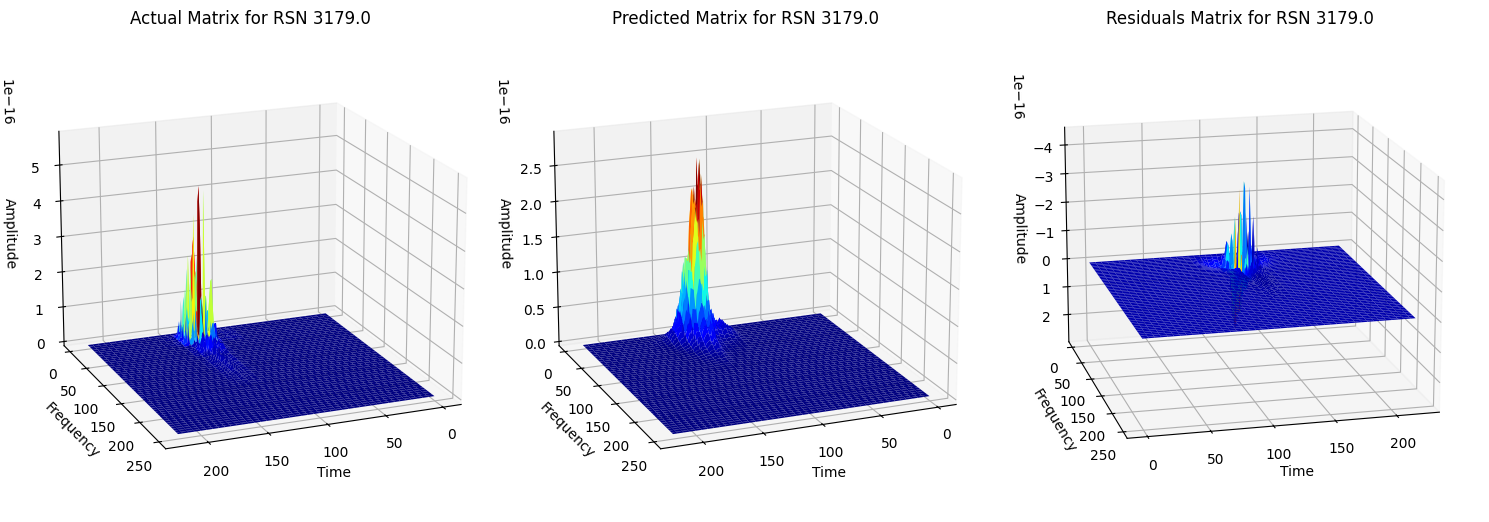

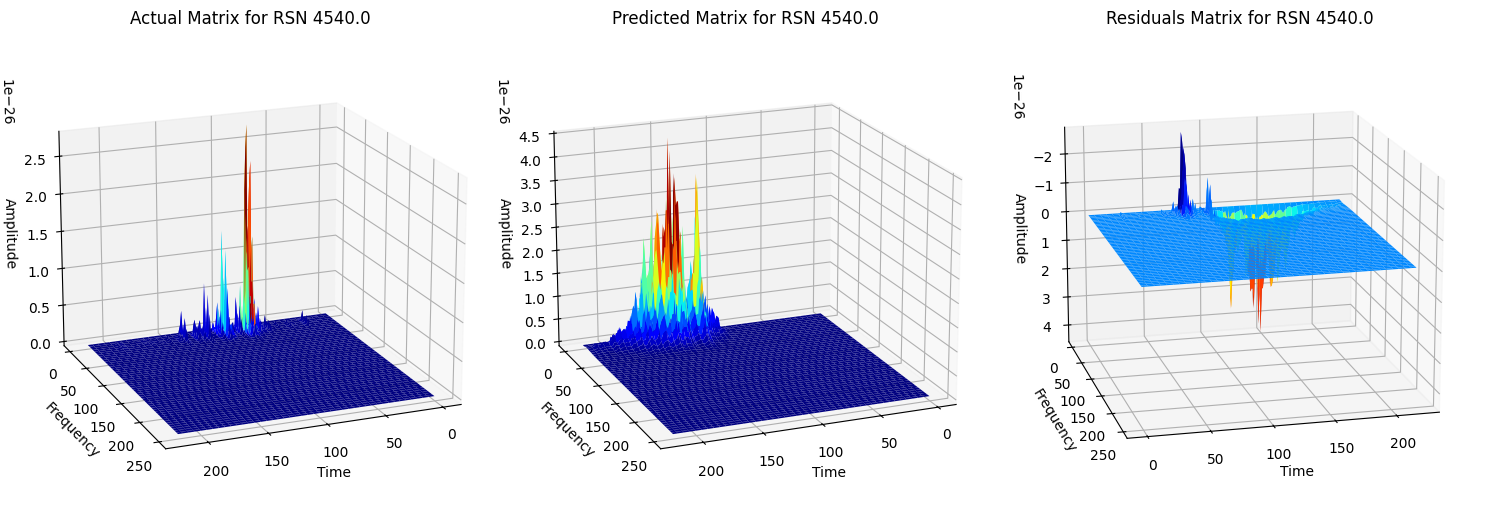

In [45]:
for i in range(len(row_no)):
    # Plotting the actual matrix in 3d and keeping the plots side by side

    fig, (ax1, ax2, ax3) = plt.subplots(
        1, 3, figsize=(15, 6), subplot_kw={'projection': '3d'})

    x1 = np.arange(actual_matrix[i].shape[0])
    y1 = np.arange(actual_matrix[i].shape[1])
    Y1, X1 = np.meshgrid(y1, x1)  # Changed the order of inputs
    ax1.plot_surface(X1, Y1, actual_matrix[i], cmap='jet')
    ax1.view_init(elev=18, azim=68)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Frequency')
    ax1.set_zlabel('Amplitude')
    ax1.set_title(f'Actual Matrix for RSN {row_no[i]}')

    x2 = np.arange(prediction_matrix[i].shape[0])
    y2 = np.arange(prediction_matrix[i].shape[1])
    Y2, X2 = np.meshgrid(y2, x2)  # Changed the order of inputs
    ax2.plot_surface(X2, Y2, prediction_matrix[i], cmap='jet')
    ax2.view_init(elev=18, azim=68)
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Frequency')
    ax2.set_zlabel('Amplitude')
    ax2.set_title(f'Predicted Matrix for RSN {row_no[i]}')

    x3 = np.arange(residuals_matrix[i].shape[0])
    y3 = np.arange(residuals_matrix[i].shape[1])
    Y3, X3 = np.meshgrid(y3, x3)  # Changed the order of inputs
    ax3.plot_surface(X3, Y3, residuals_matrix[i], cmap='jet')
    ax3.view_init(elev=-164, azim=-76)
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Frequency')
    ax3.set_zlabel('Amplitude')
    ax3.set_title(f'Residuals Matrix for RSN {row_no[i]}')

    plt.tight_layout()  # Adjust the subplots to give some space
    plt.show()

In [68]:
print(len(freqEnv_actual_row[0]))
print(len(freqEnv_prediction_row[0]))
print(len(timeEnv_actual_row[0]))
print(len(timeEnv_prediction_row[0]))



250
250
220
220


In [84]:
# converting the actual and the predicted time and frequency envelope to accleration time history
# t = time, s ( in our it is the time envelope)
# n = length of acc (say 80 for now)
# f = Freq correspond to Epsd_freq envelopes, Hz  (in our case it is the frequency envelope)
# XS_t_f = EPSD  (in our case it is the actual or predicted time envelope)
# Ttot = Total time period, s (in our case it is lenght of time envelope *)

acc_actual = []
acc_prediction = []
Ttot= int(len(timeEnv_actual_row[0])*0.5)
Ttot

110

In [85]:
import numpy as np

def accleartion_time_history(t, n, f, XS_t_f, Ttot):
    om_0 = 2 * np.pi / Ttot
    ACC = np.zeros((len(t), n))
    aa = 0
    b = 2 * np.pi
    tt = np.array(t)  # Ensure tt is a NumPy array
    
    for h in range(n):
        r = (b - aa) * np.random.rand(len(f)) + aa
        ACC[:, h] = np.zeros(len(t))
        for kk in range(len(f)):
            Cn = np.sqrt(2 * XS_t_f[:, kk])
            cosin = np.cos((kk * om_0 * tt) + r[kk])
            a_t = Cn * cosin
            ACC[:, h] += a_t
    
    return ACC

# Example usage:
for i in range(len(row_no)):
    acc_actual.append(accleartion_time_history(timeEnv_actual_row[i], 1, freqEnv_actual_row[i], actual_matrix[i], Ttot))
    acc_prediction.append(accleartion_time_history(timeEnv_prediction_row[i], 1, freqEnv_prediction_row[i], prediction_matrix[i], Ttot))




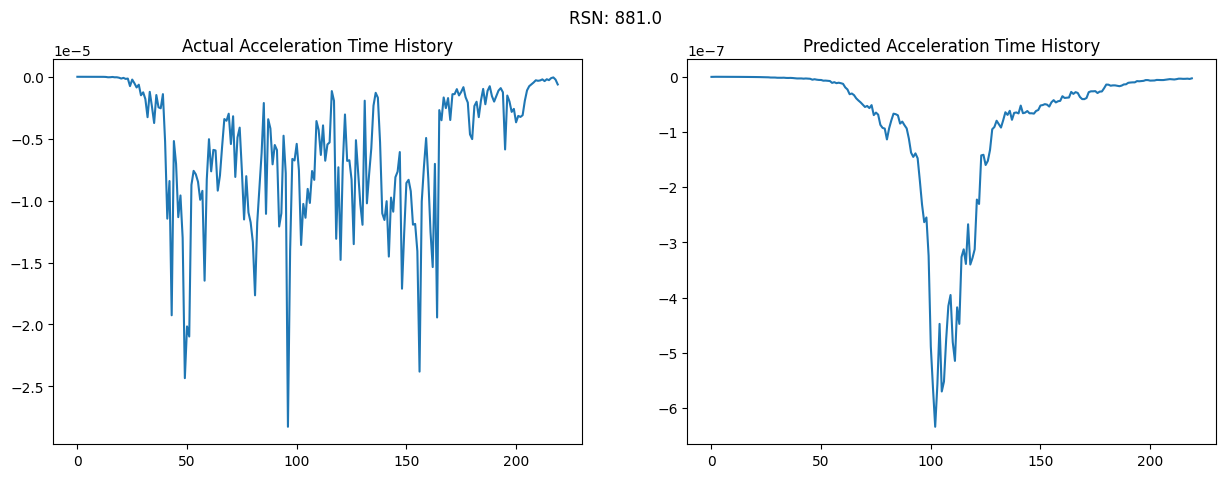

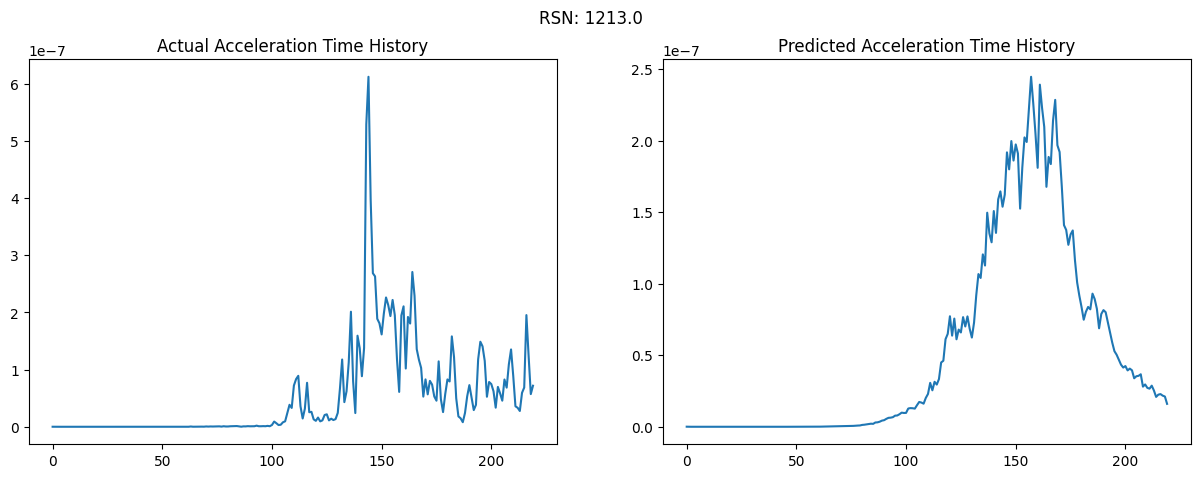

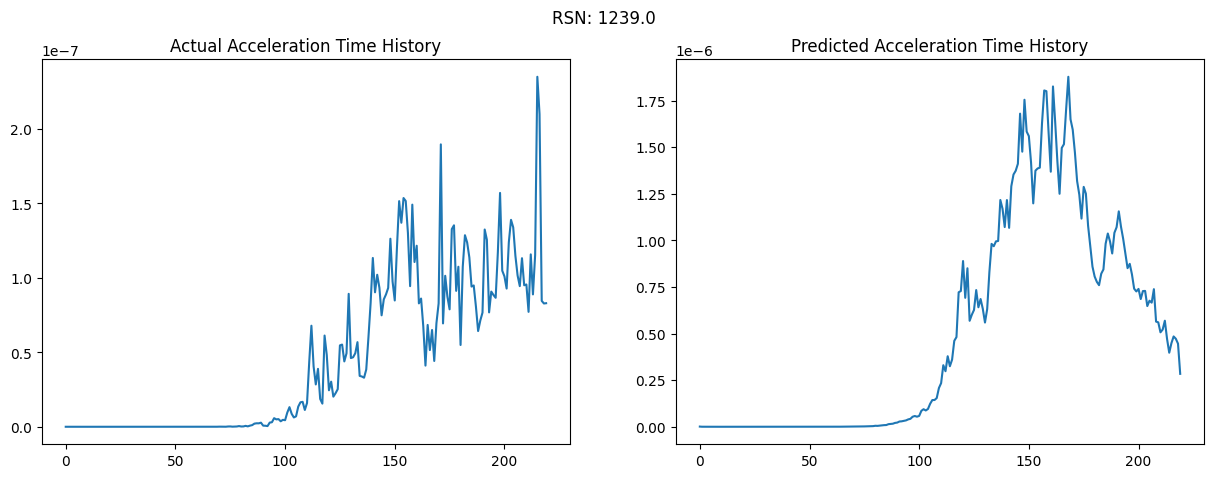

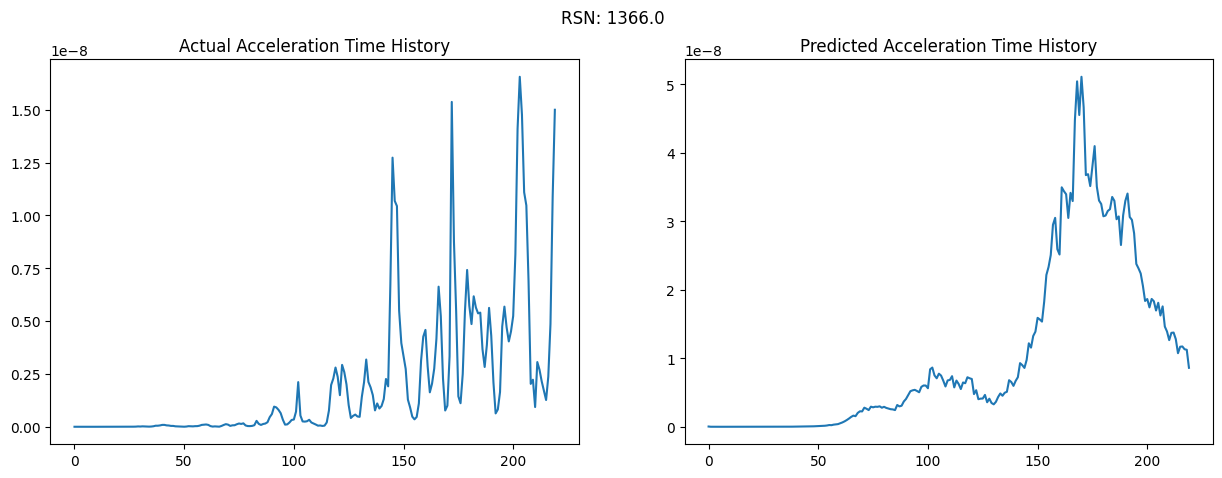

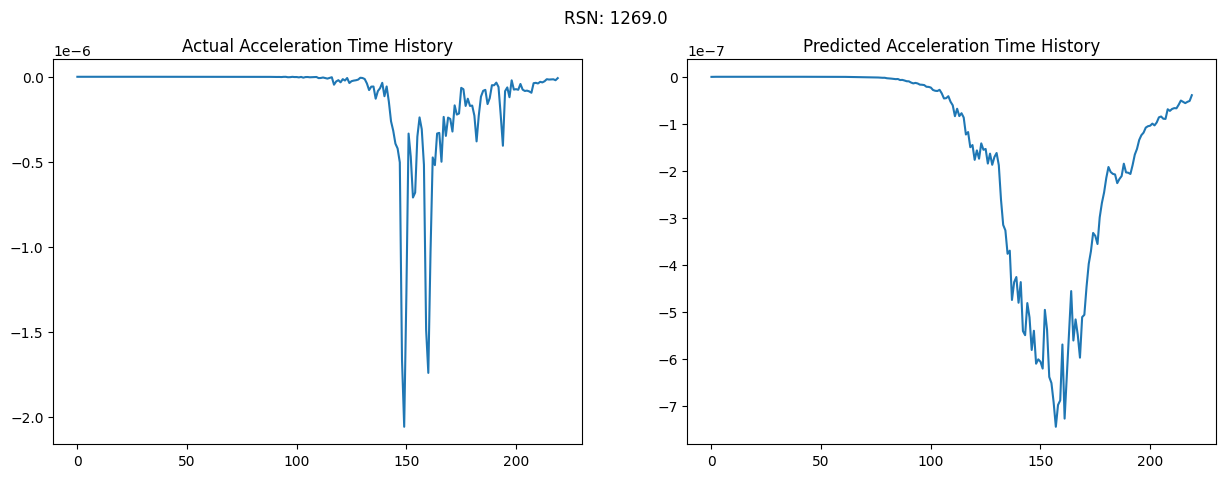

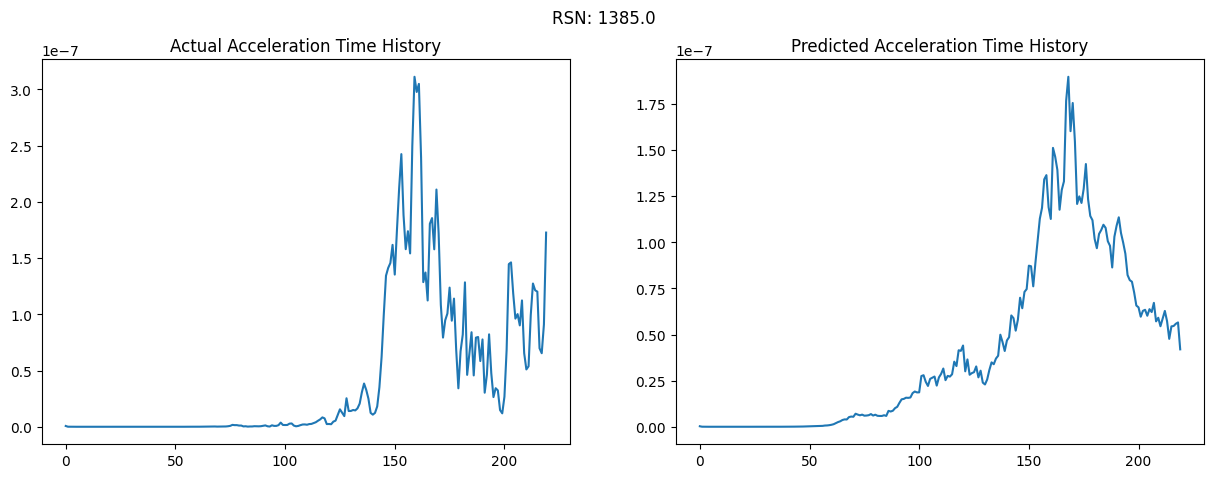

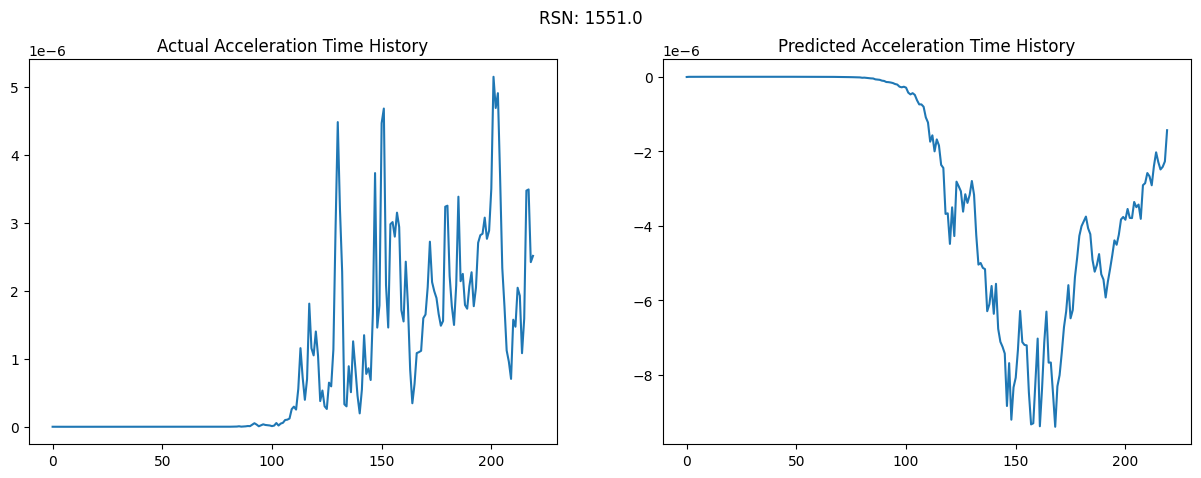

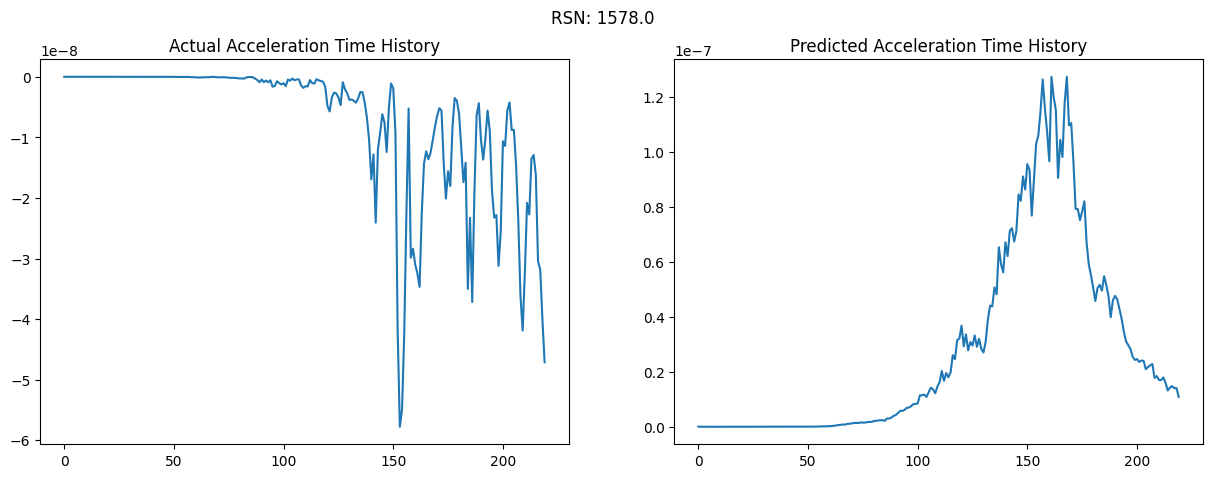

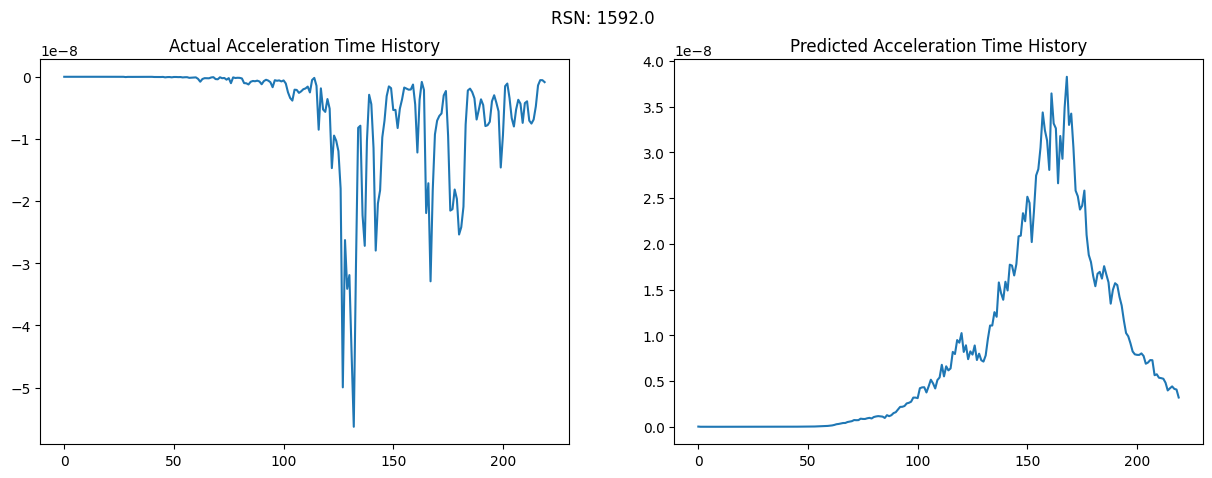

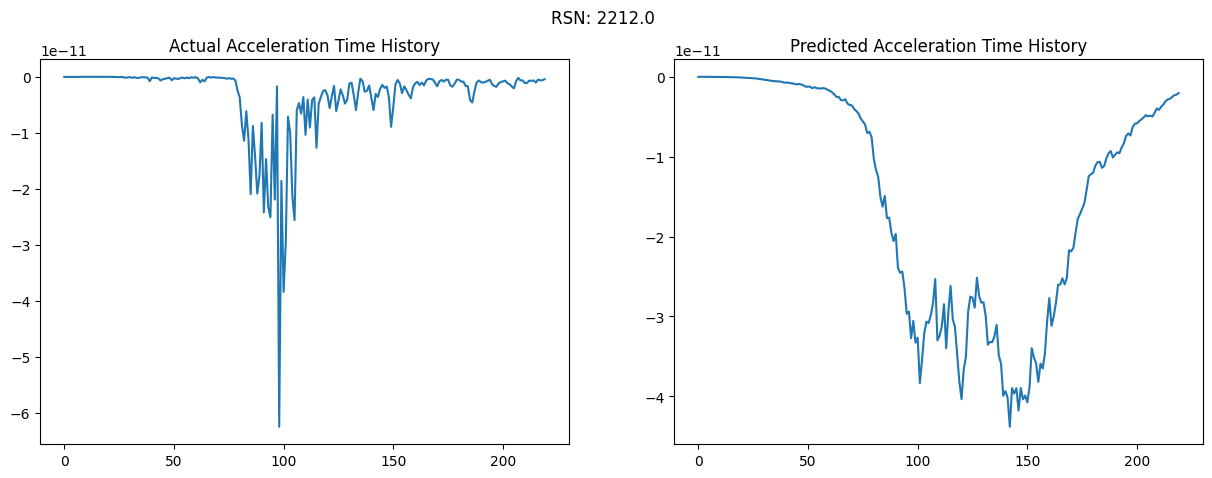

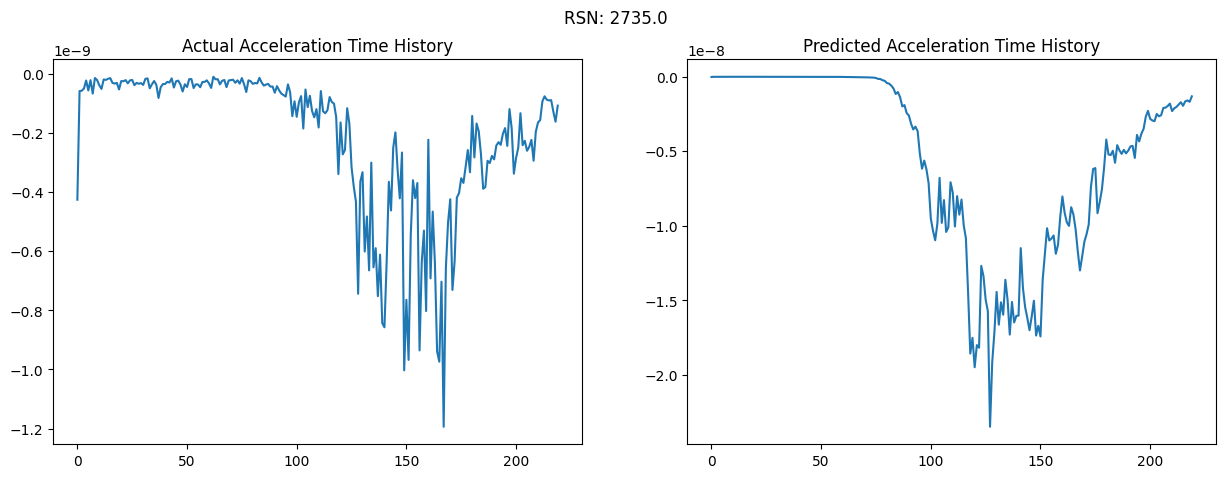

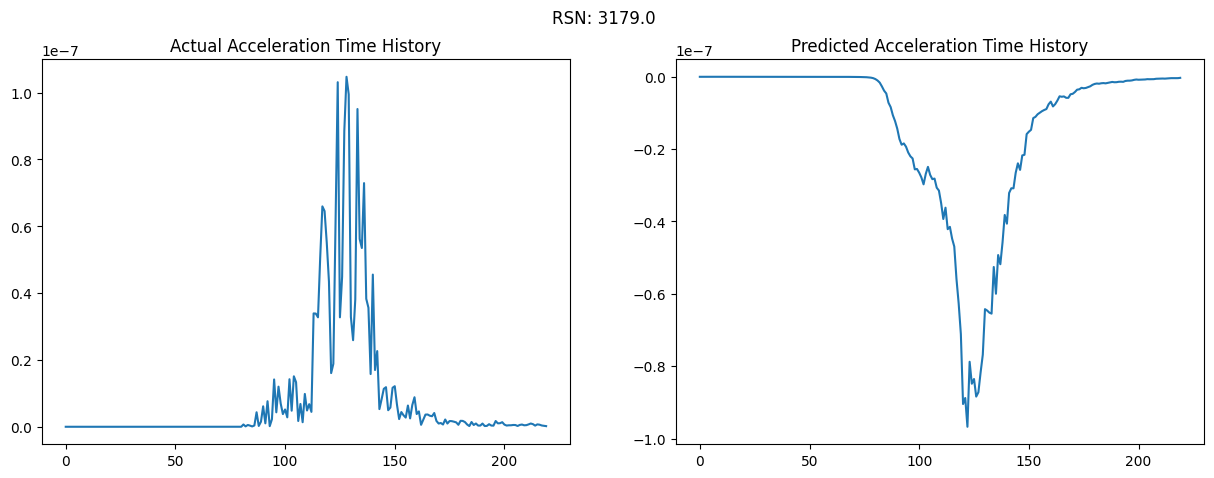

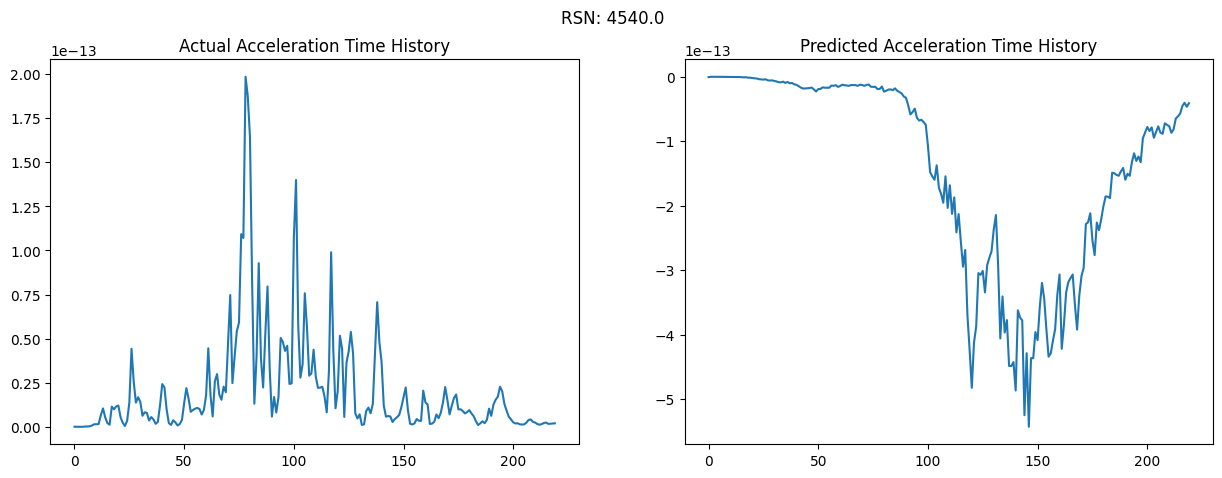

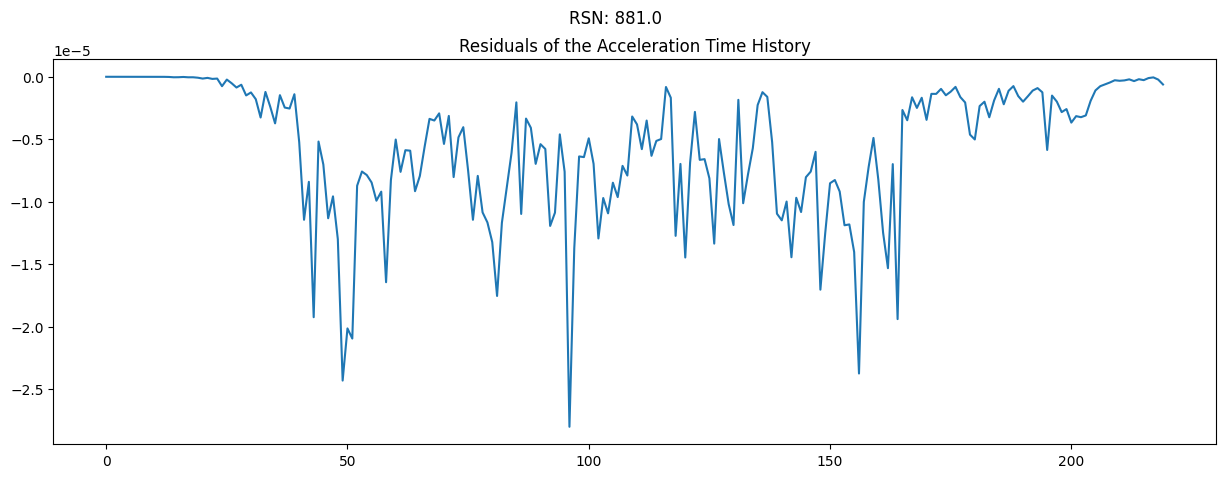

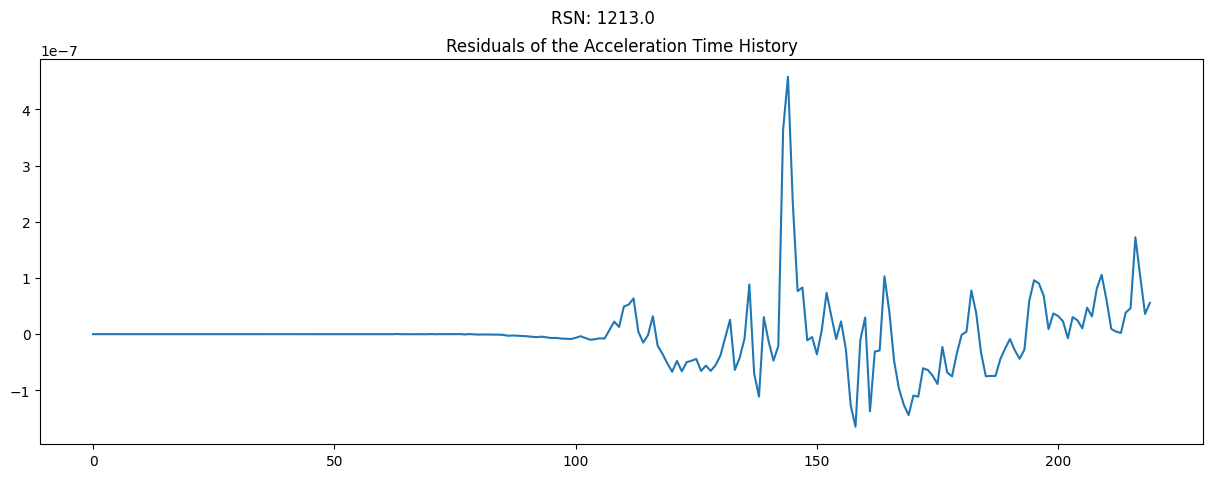

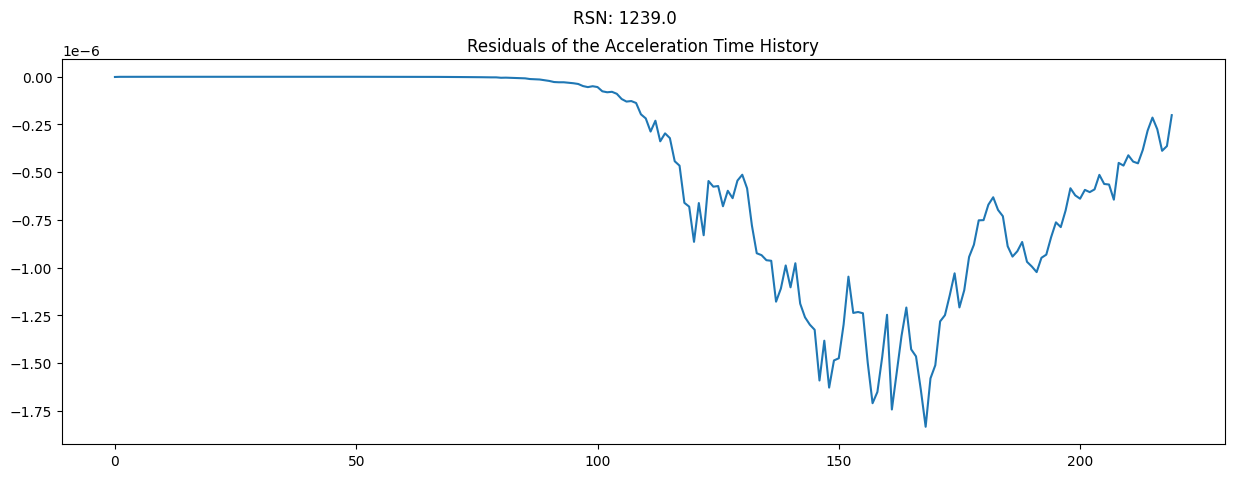

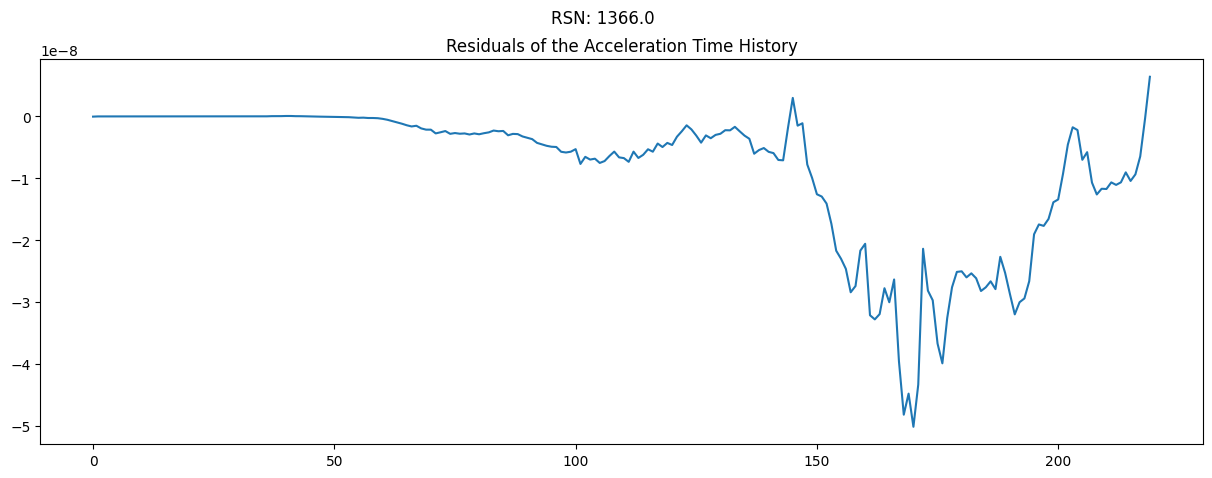

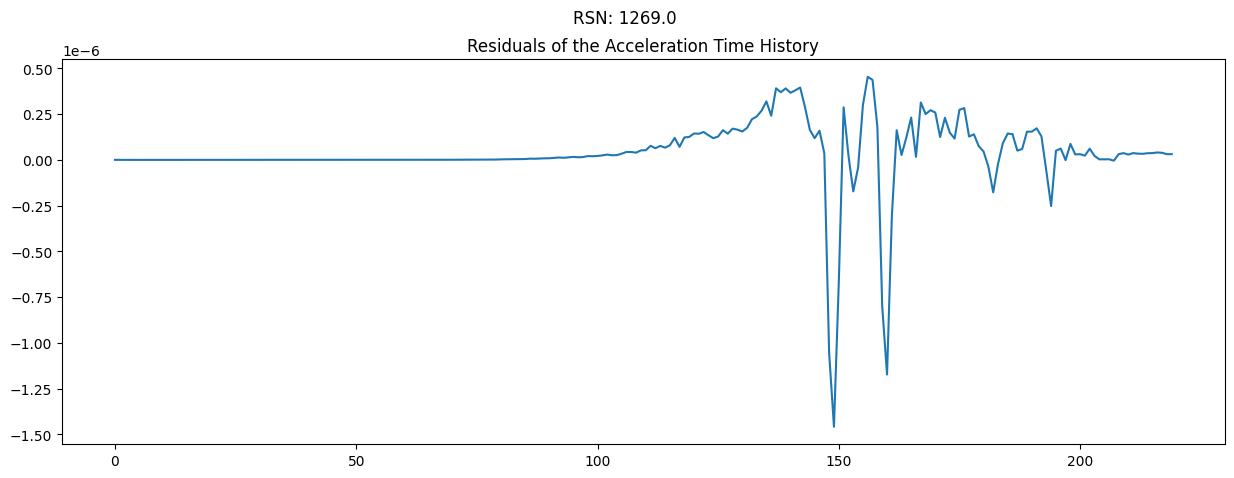

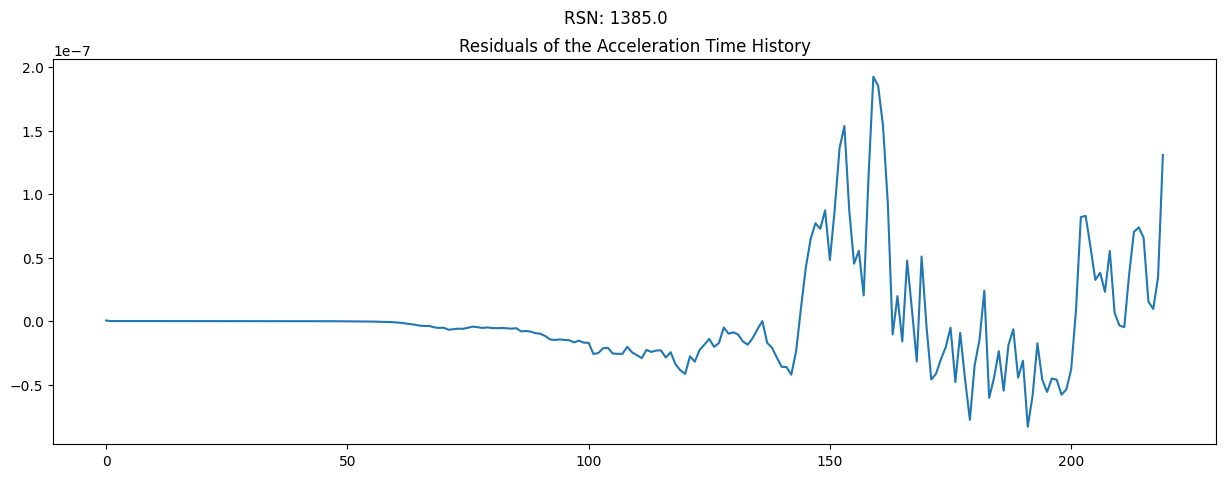

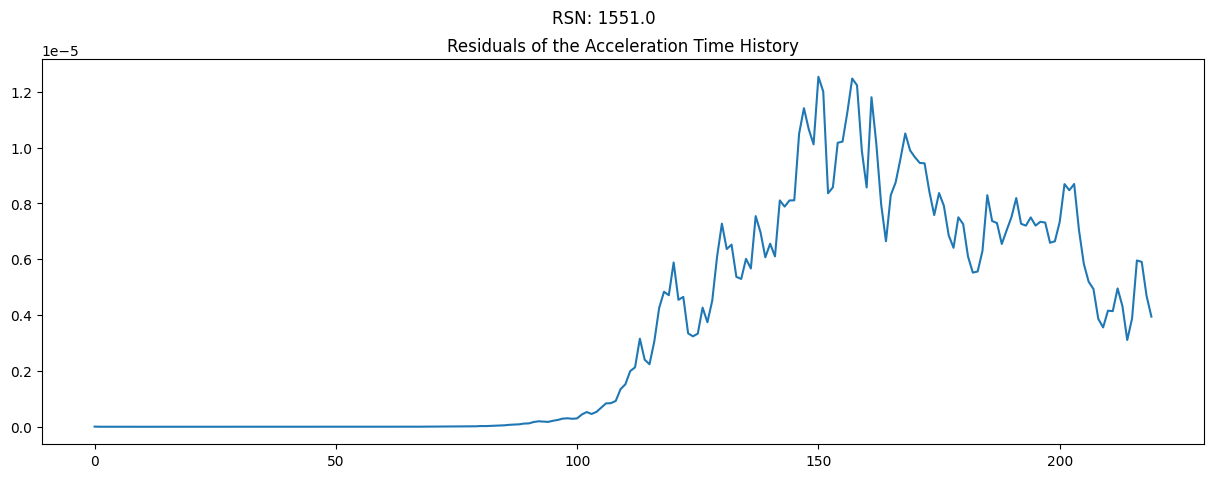

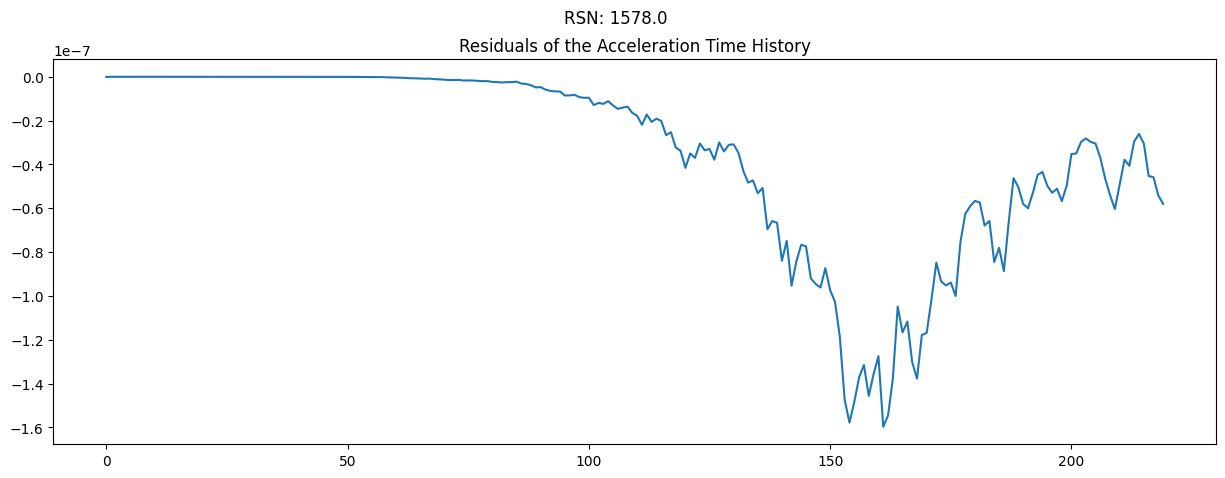

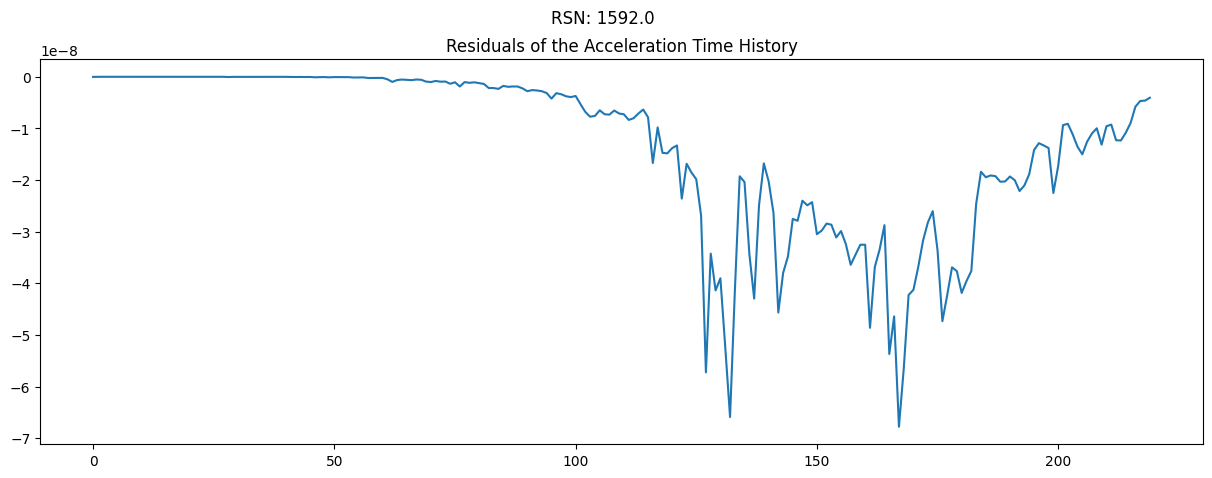

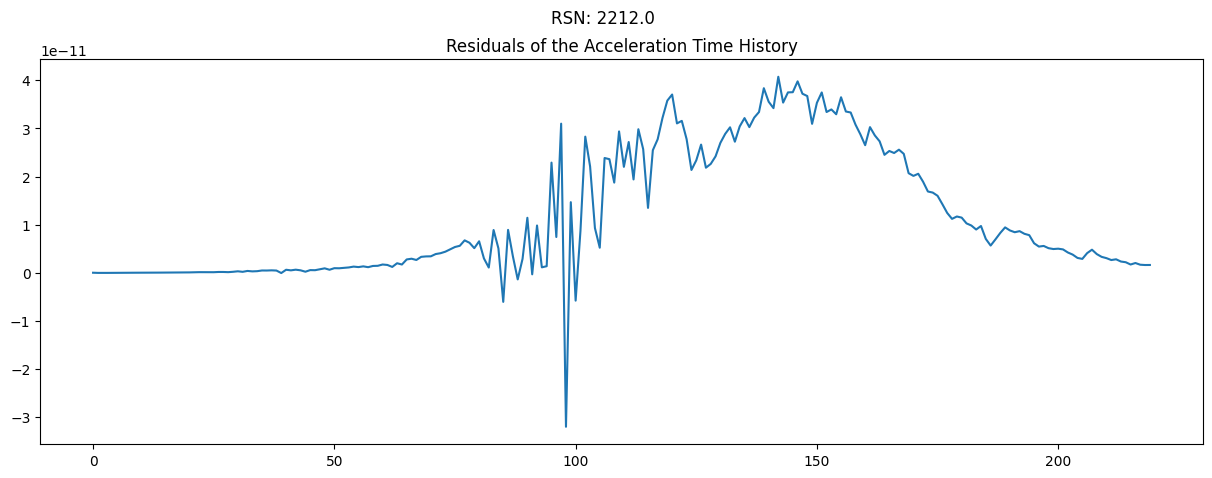

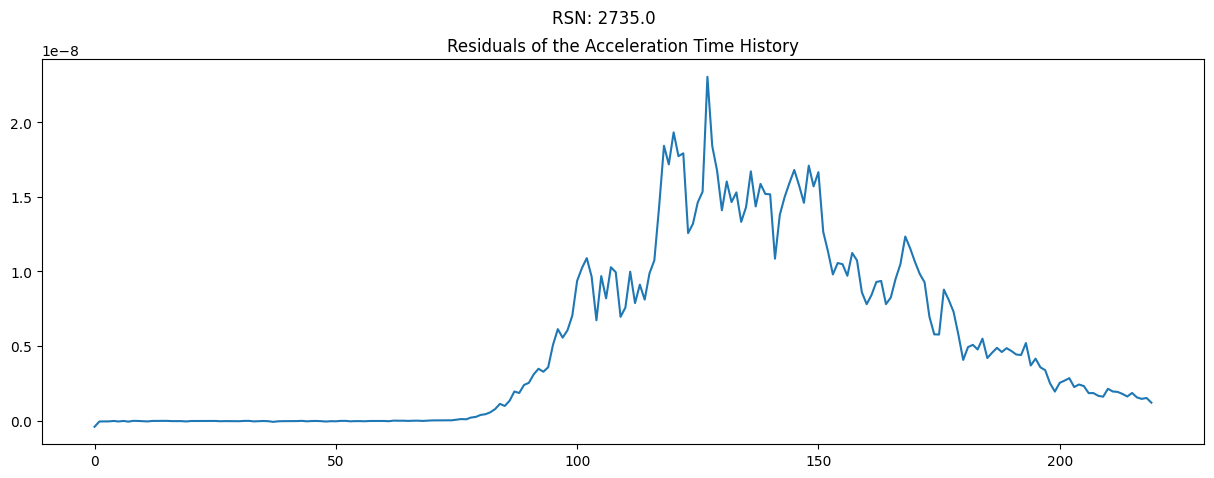

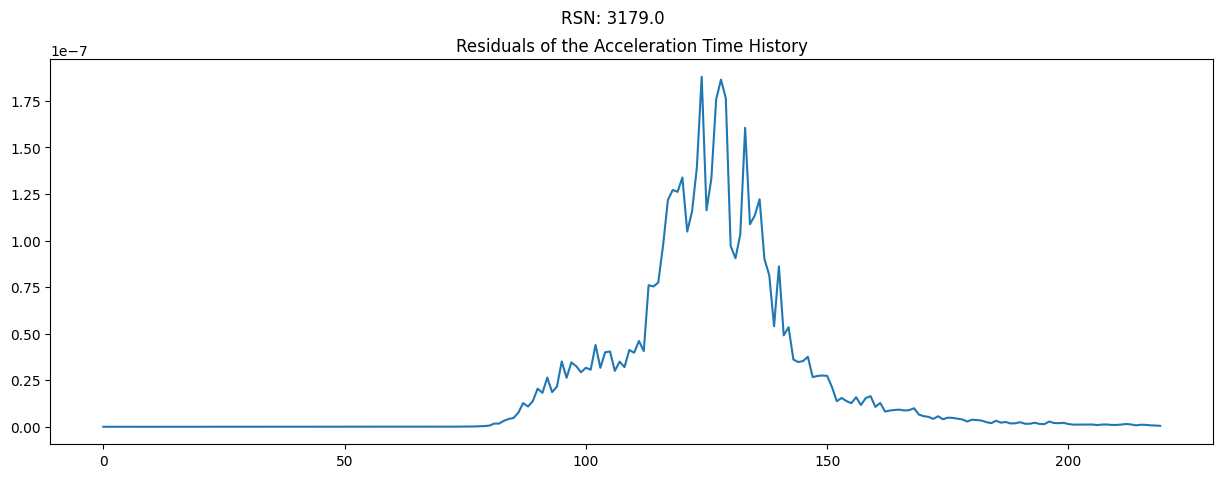

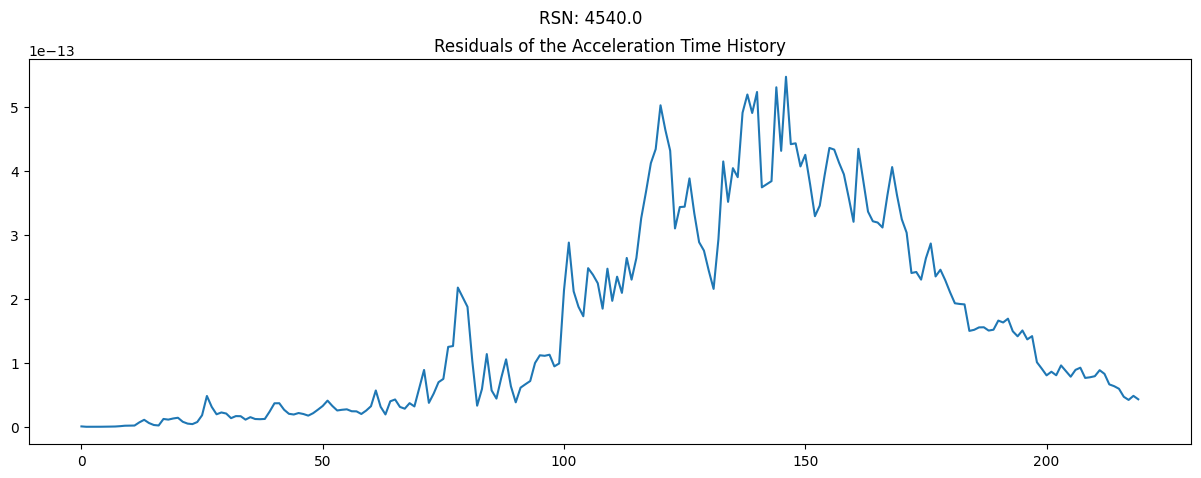

In [86]:
# plotting the actual and predicted acceleration time history
for i in range(len(row_no)):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(acc_actual[i])
    axs[0].set_title('Actual Acceleration Time History')
    axs[1].plot(acc_prediction[i])
    axs[1].set_title('Predicted Acceleration Time History')
    plt.suptitle('RSN: '+str(row_no[i]))
    plt.show()

# calculating the residuals of the acceleration time history
residuals_acc = []
for i in range(len(row_no)):
    residuals_acc.append(acc_actual[i] - acc_prediction[i])


# plotting the residuals of the acceleration time history
for i in range(len(row_no)):
    fig, axs = plt.subplots(1, 1, figsize=(15, 5))
    axs.plot(residuals_acc[i])
    axs.set_title('Residuals of the Acceleration Time History')
    plt.suptitle('RSN: '+str(row_no[i]))
    plt.show()


In [89]:
import numpy as np

def responsespectrum(accel, ee, dt):
    # ee - damping in % - 5 is recommended
    # y - gamma in newmark's method - 0.5 is recommended
    # b - beta in newmark's method - 0.25 is recommended
    # td - time till which you want graph to be plotted

    Tn = 10  # time period till which you want response spectrum
    y = 0.5
    b = 0.25
    uo = 0
    vo = 0
    m = 1
    z = ee / 100

    na = len(accel)
    nl = 2 * na
    T = np.array([0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.075, 0.09, 0.1,
                  0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1, 1.2,
                  1.5, 2, 2.5, 3, 4, 5, 6, 7.5, 8, 9, 10])

    accel = np.concatenate((accel, np.zeros(nl - na)))
    p = -m * accel

    A = np.zeros(len(T))  # acceleration response spectrum - total acceleration
    V = np.zeros(len(T))  # velocity response spectrum - relative velocity
    D = np.zeros(len(T))  # displacement response spectrum - relative displacement

    for j in range(len(T)):
        fn = 1 / T[j]
        wn = 2 * np.pi * fn
        k = m * wn**2
        c = 2 * m * wn * z

        u = np.zeros(nl)
        v = np.zeros(nl)
        ac = np.zeros(nl)

        u[0] = uo
        v[0] = vo
        ac[0] = (p[0] - c * vo - k * uo) / m

        kf = k + y * c / (b * dt) + m / (b * dt**2)
        a = m / (b * dt) + y * c / b
        b2 = m / (2 * b) + dt * (y / (2 * b) - 1) * c

        for i in range(nl - 1):
            p1 = p[i]
            p2 = p[i + 1]
            dpf = (p2 - p1) + a * v[i] + b2 * ac[i]
            du = dpf / kf
            dv = y / (b * dt) * du - (y / b) * v[i] + dt * (1 - y / (2 * b)) * ac[i]
            da = du / (b * dt**2) - v[i] / (b * dt) - ac[i] / (2 * b)
            u[i + 1] = u[i] + du
            v[i + 1] = v[i] + dv
            ac[i + 1] = ac[i] + da

        asd = ac + accel
        A[j] = np.max(np.abs(asd))
        V[j] = np.max(np.abs(v))
        D[j] = np.max(np.abs(u))

    A = np.concatenate(([np.max(np.abs(accel))], A))
    V = np.concatenate(([0], V))
    D = np.concatenate(([0], D))

    PSV = (2 * np.pi / T) * D[1:]  # pseudo spectral velocity
    PSV = np.concatenate(([PSV[0]], PSV))
    PSA = ((2 * np.pi / T)**2) * D[1:]  # pseudo spectral acceleration
    PSA = np.concatenate(([PSA[0]], PSA))
    T = np.concatenate(([0], T))

    return A, T

# Example usage:
# accel = np.random.randn(1000)  # Example acceleration data
# ee = 5  # Damping percentage
# dt = 0.02  # Time step
# A, T = responsespectrum(accel, ee, dt)

A_actual = []
T_actual = []
A_prediction = []
T_prediction = []
for i in range(len(row_no)):
    A_actual0, T_actual0 = responsespectrum(acc_actual[i][:, 0], 5, 0.02)
    A_actual.append(A_actual0)
    T_actual.append(T_actual0)
    A_prediction0, T_prediction0 = responsespectrum(acc_prediction[i][:, 0], 5, 0.02)
    A_prediction.append(A_prediction0)
    T_prediction.append(T_prediction0)

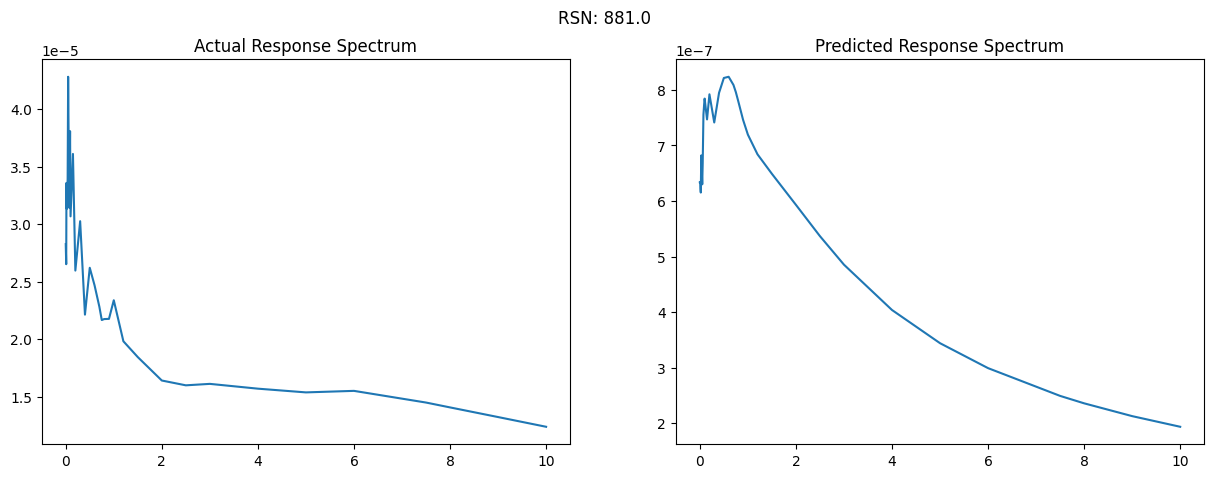

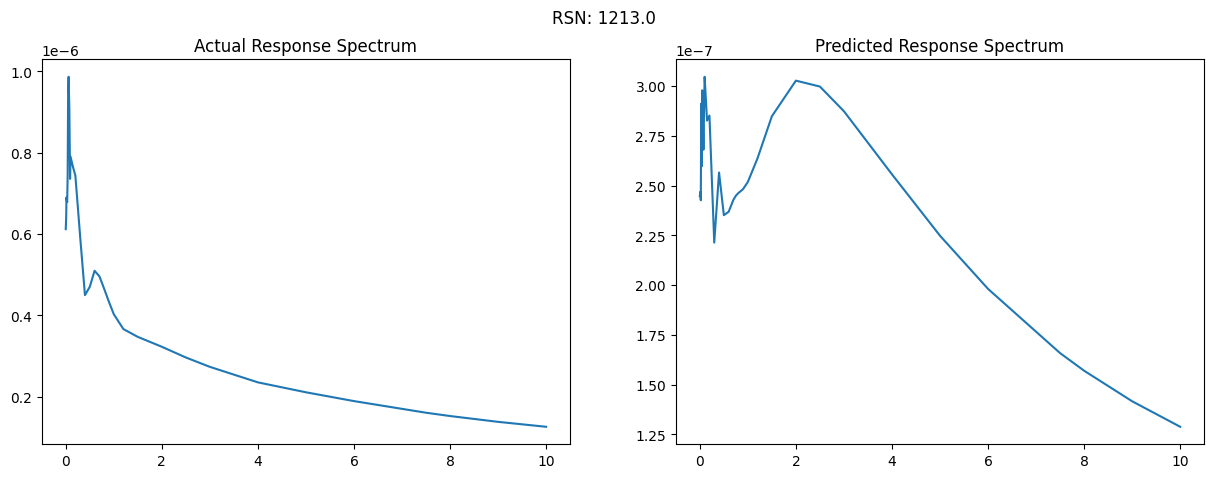

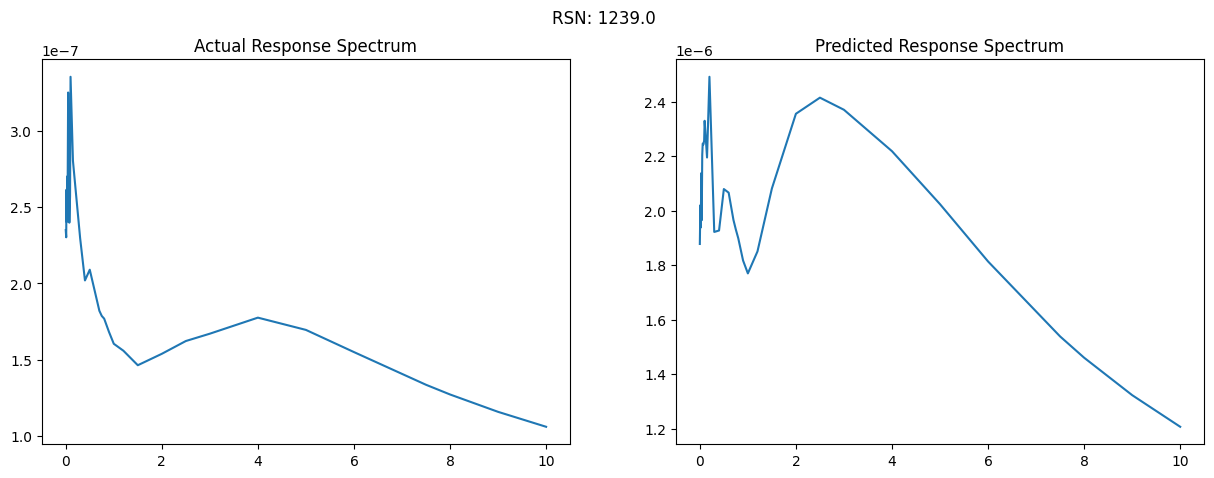

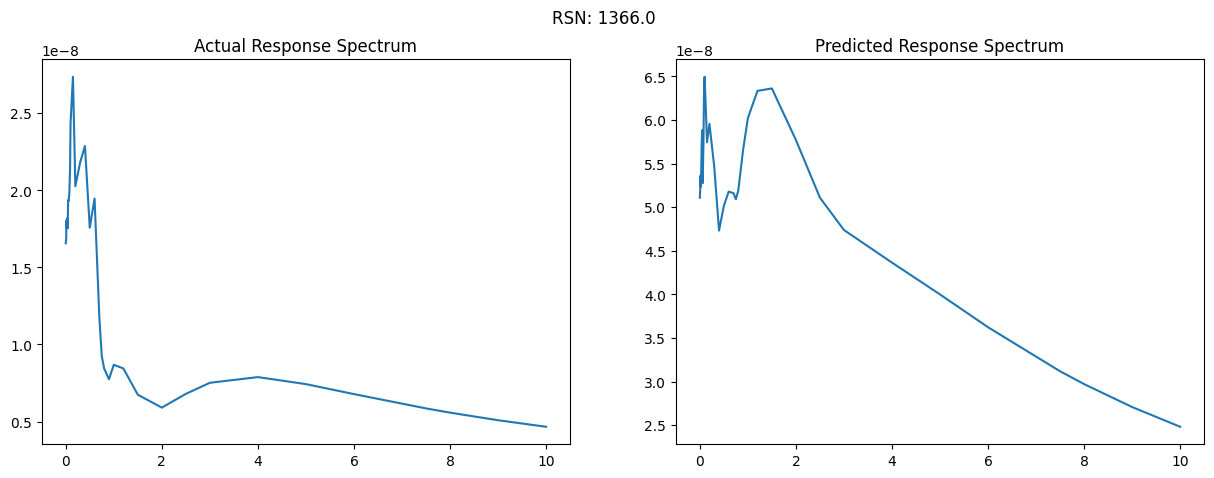

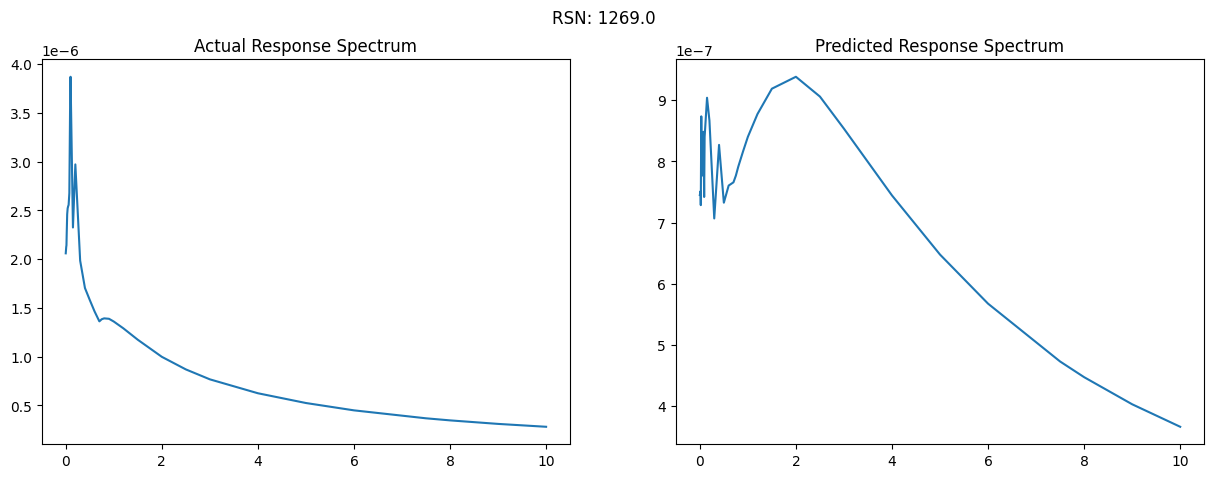

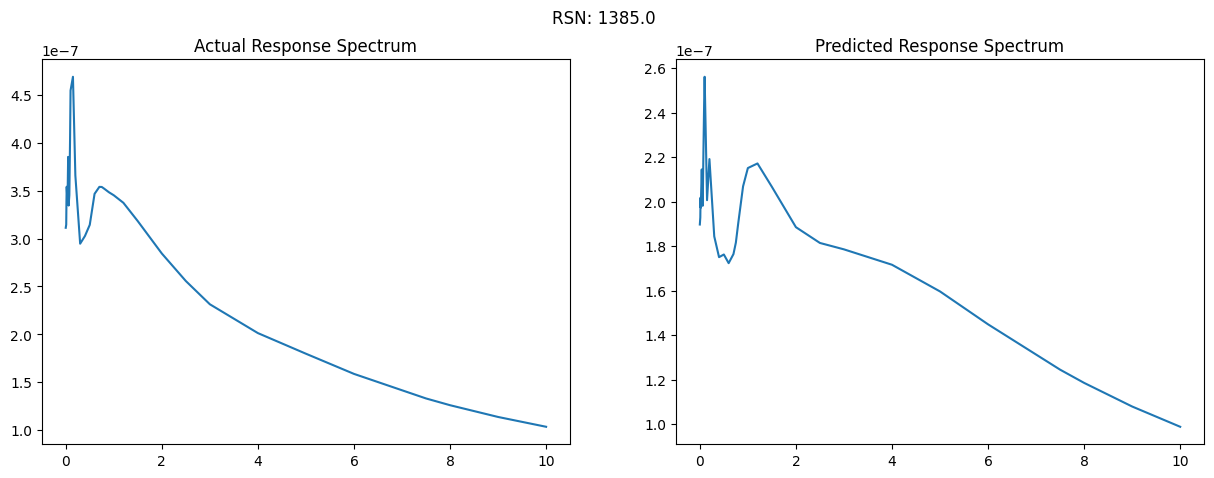

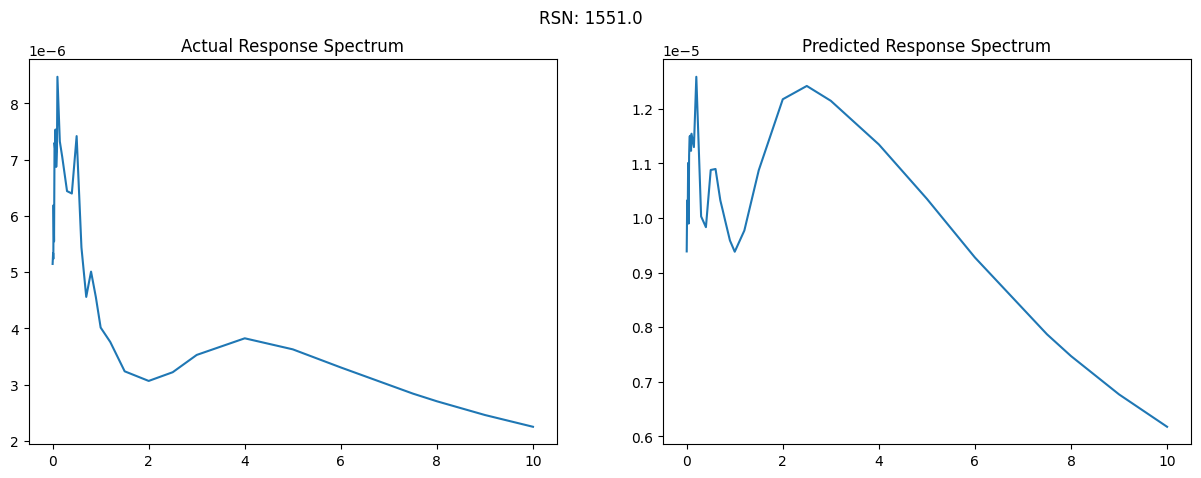

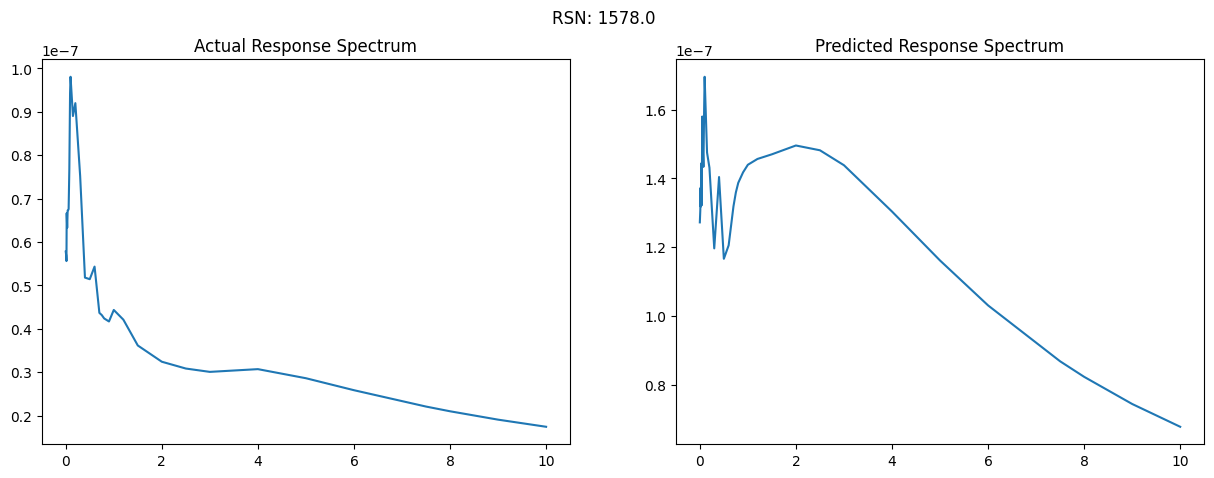

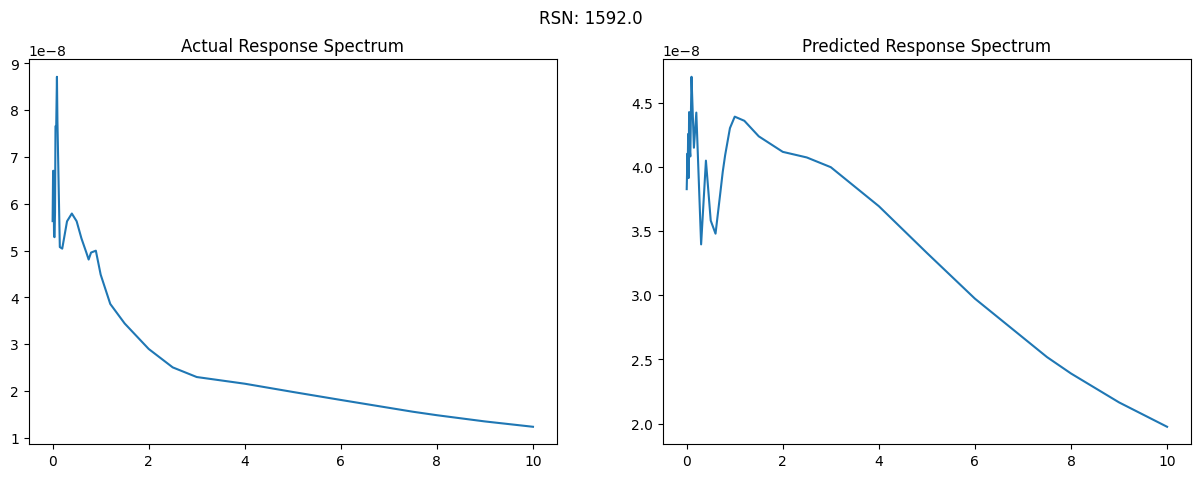

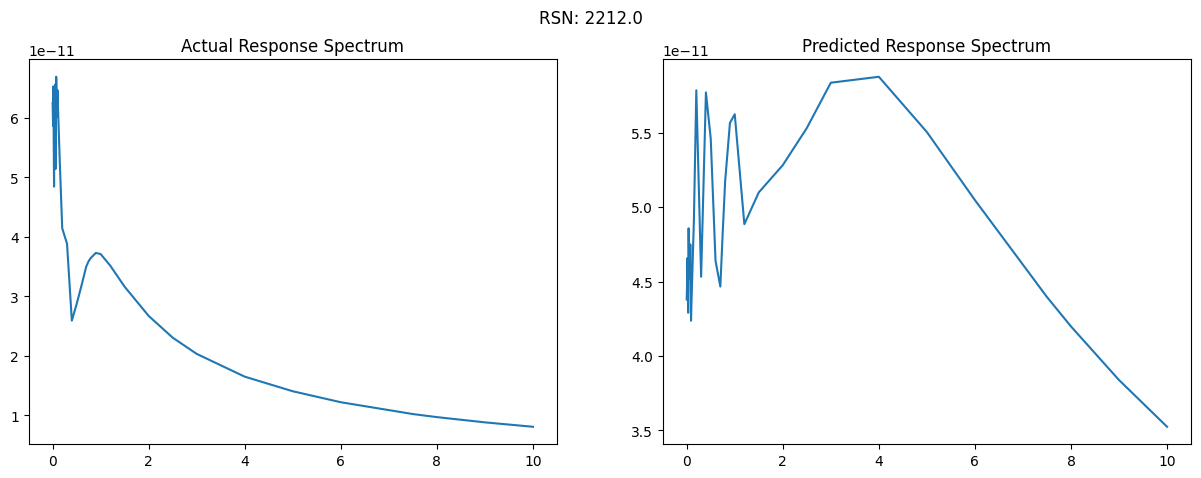

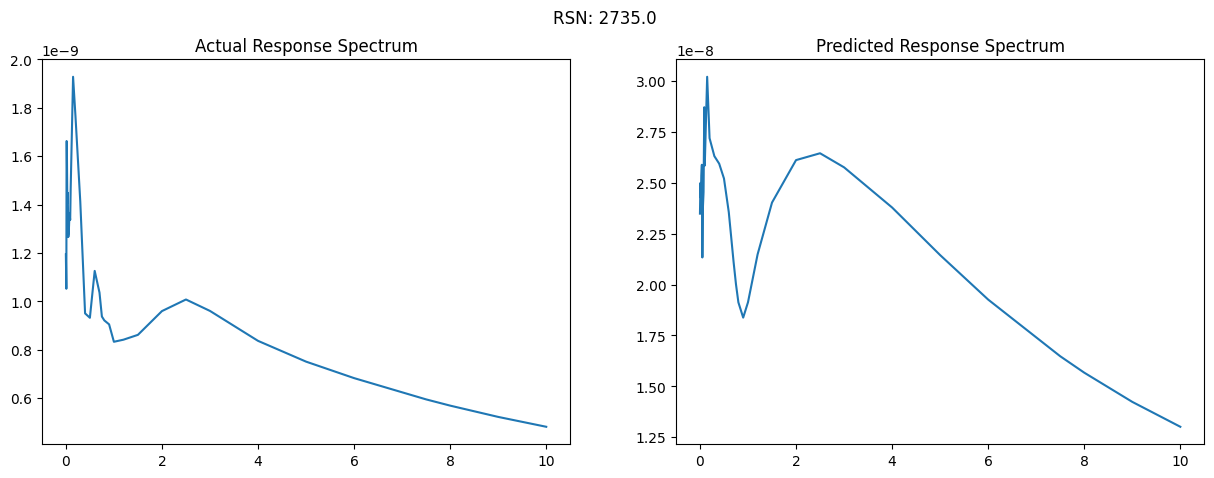

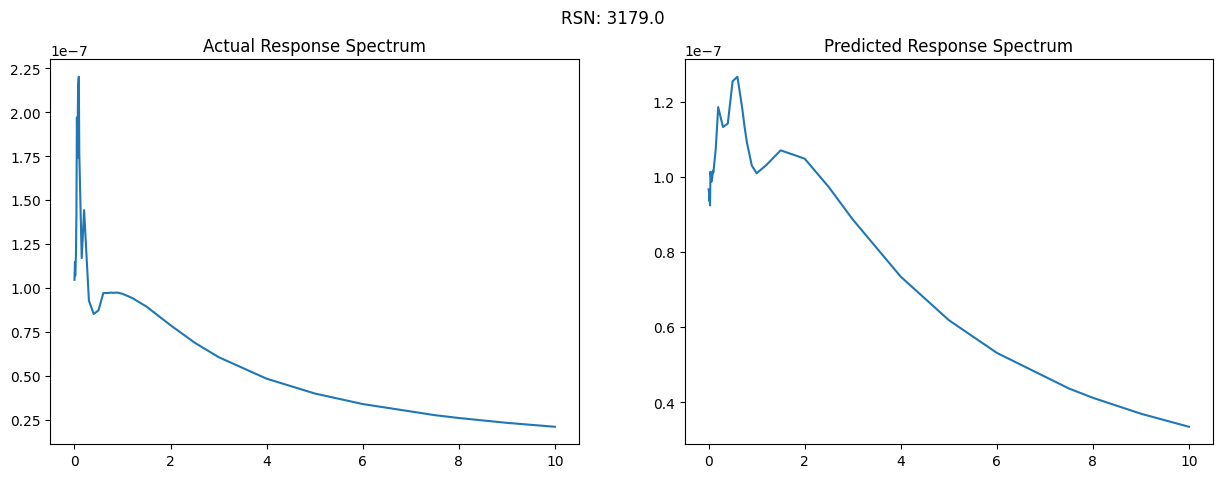

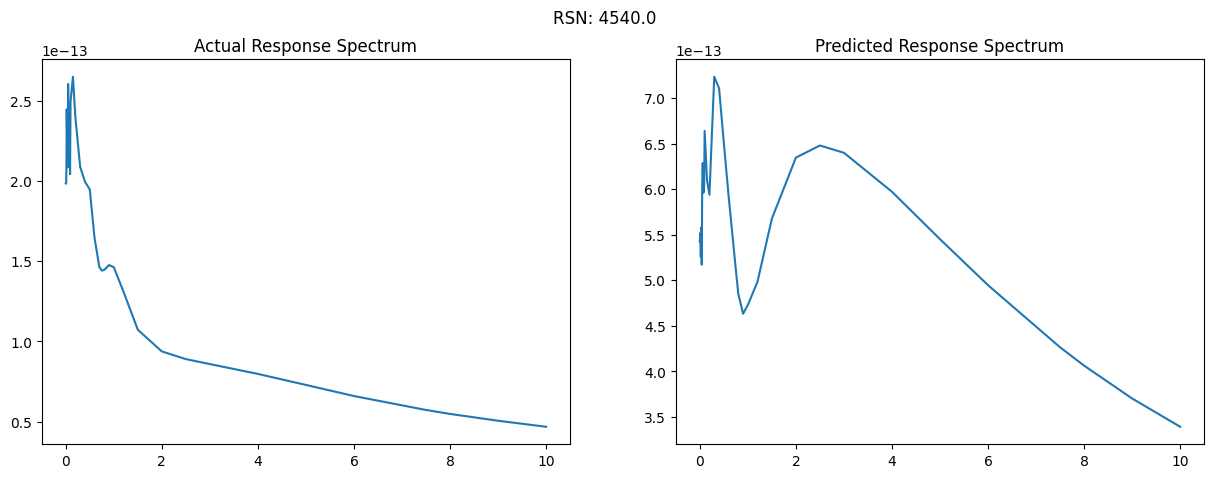

In [90]:
# plotting the actual and predicted response spectrum
for i in range(len(row_no)):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(T_actual[i], A_actual[i])
    axs[0].set_title('Actual Response Spectrum')
    axs[1].plot(T_prediction[i], A_prediction[i])
    axs[1].set_title('Predicted Response Spectrum')
    plt.suptitle('RSN: '+str(row_no[i]))
    plt.show()
    


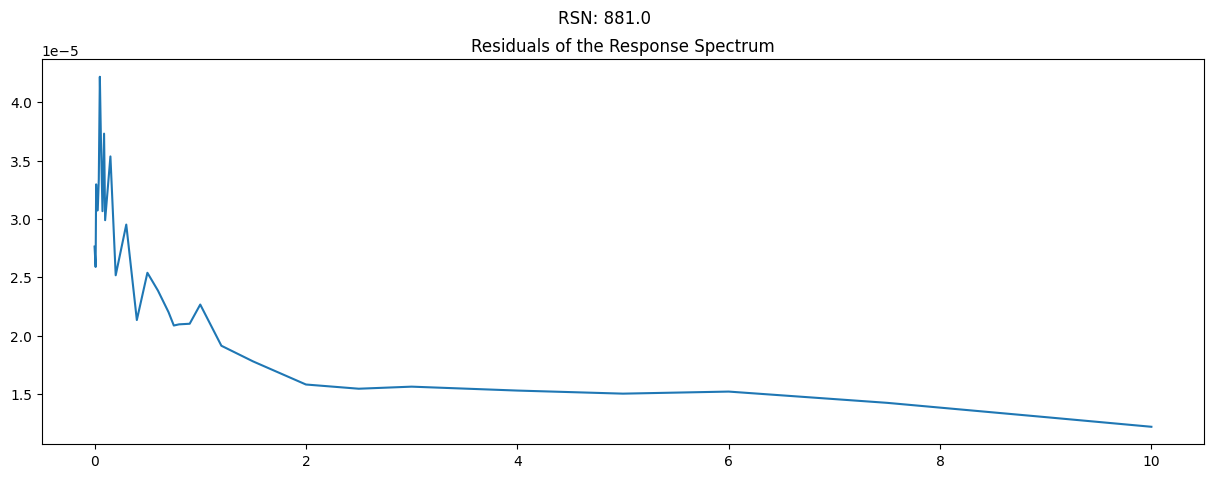

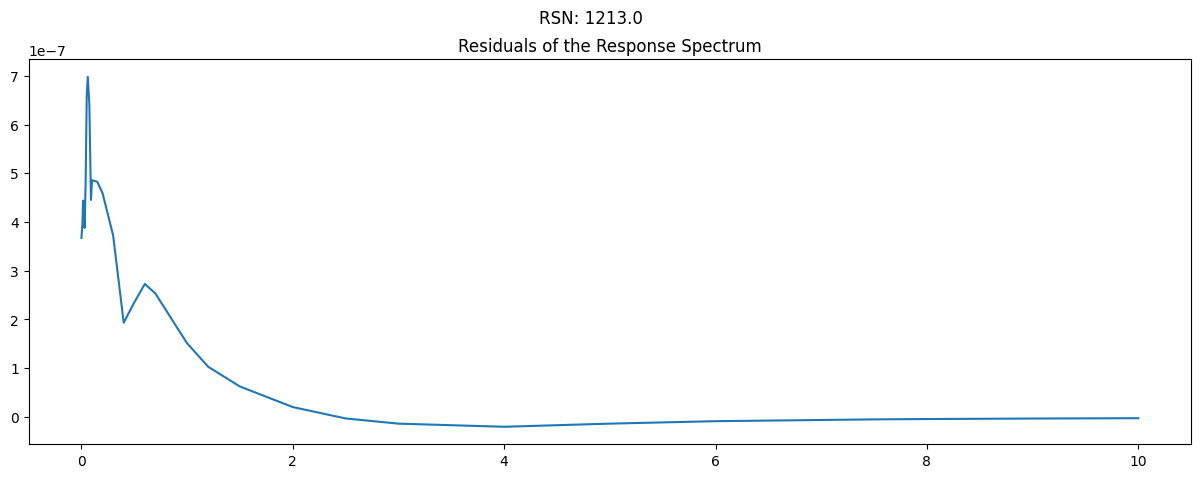

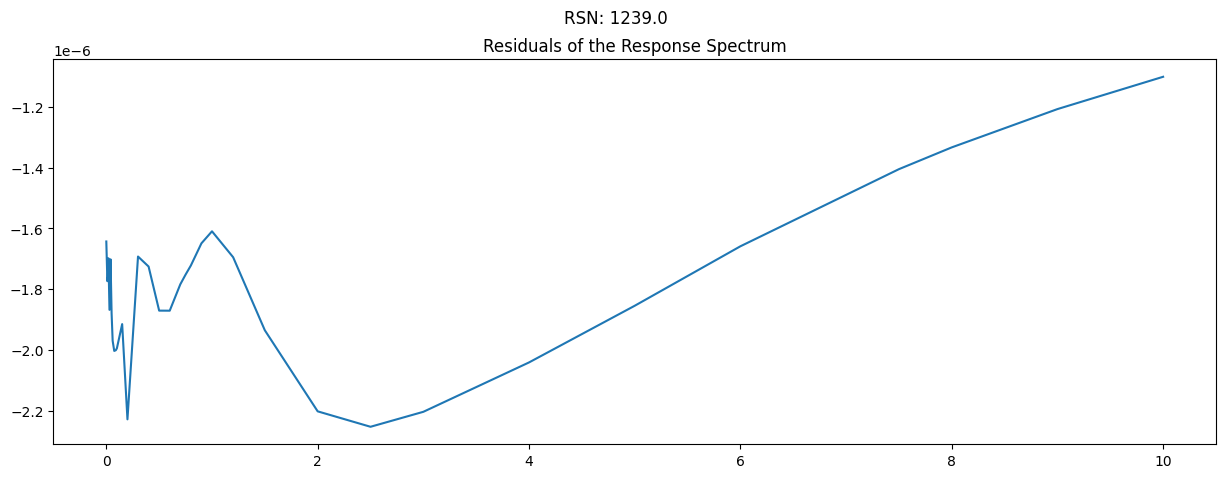

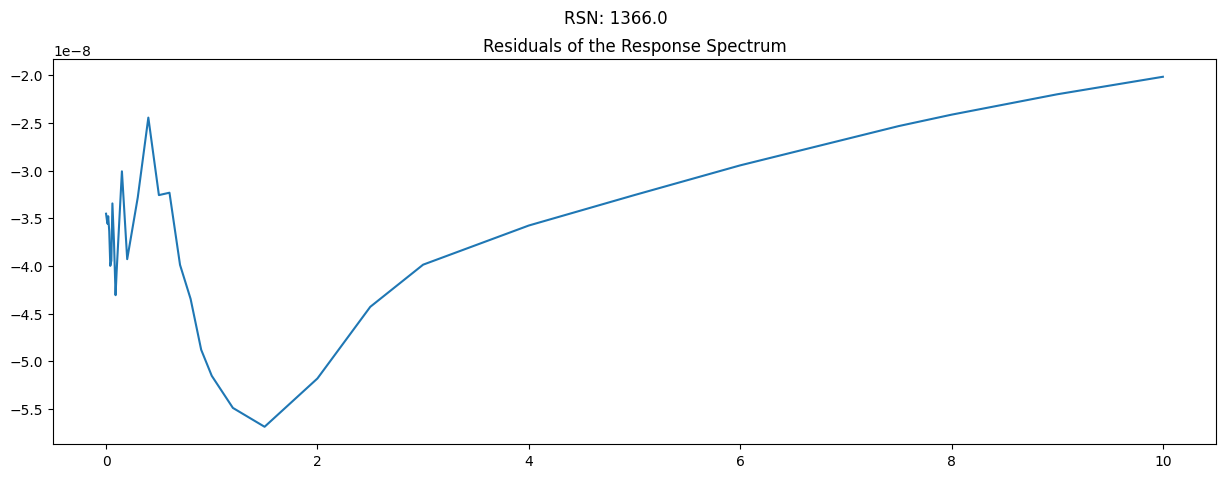

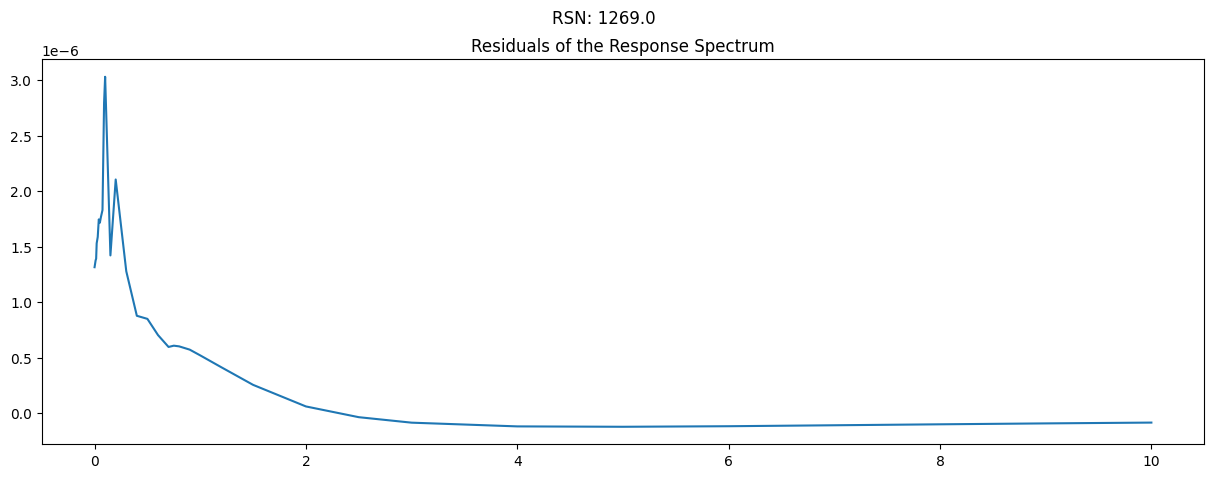

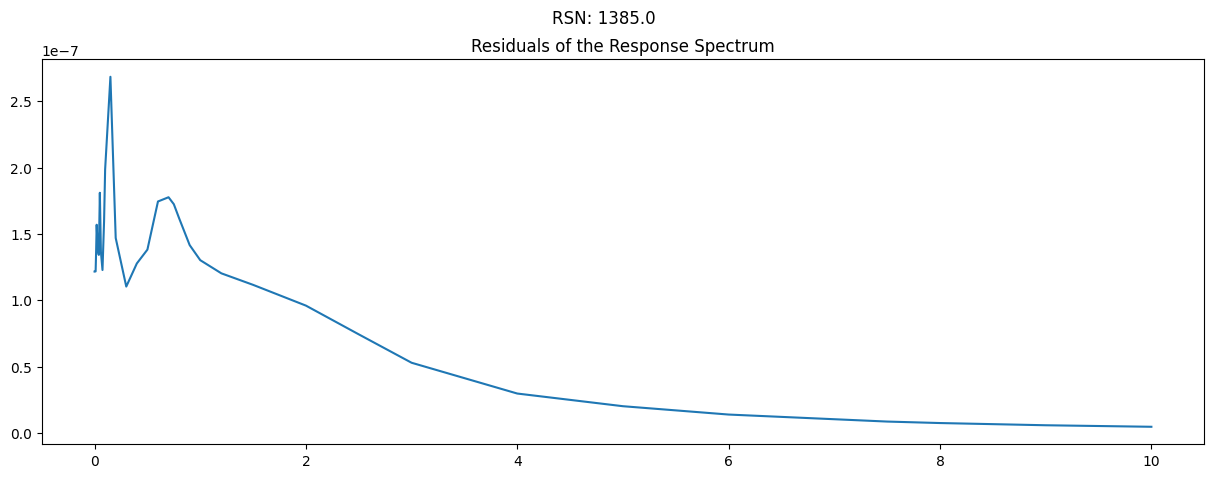

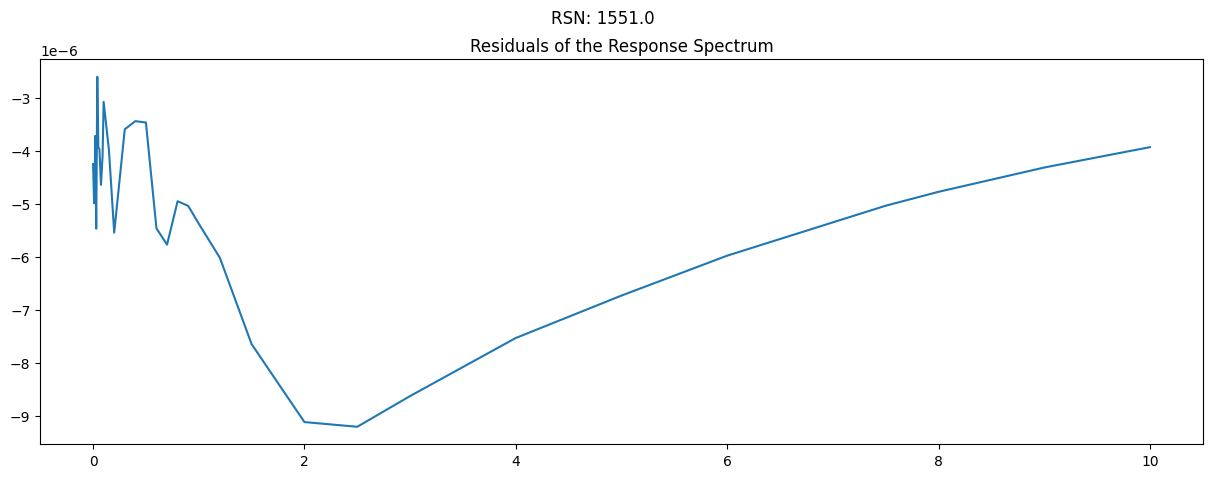

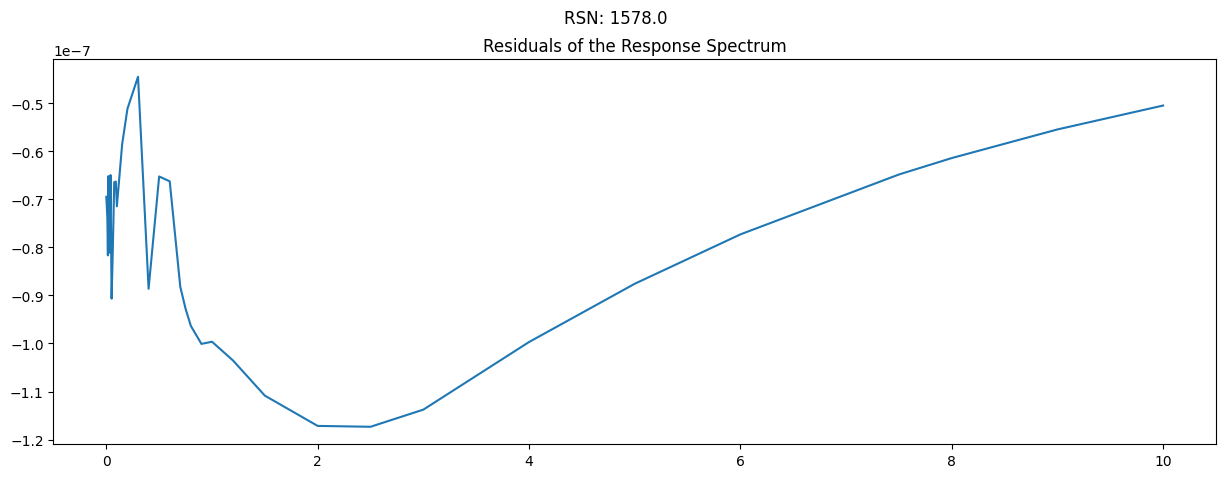

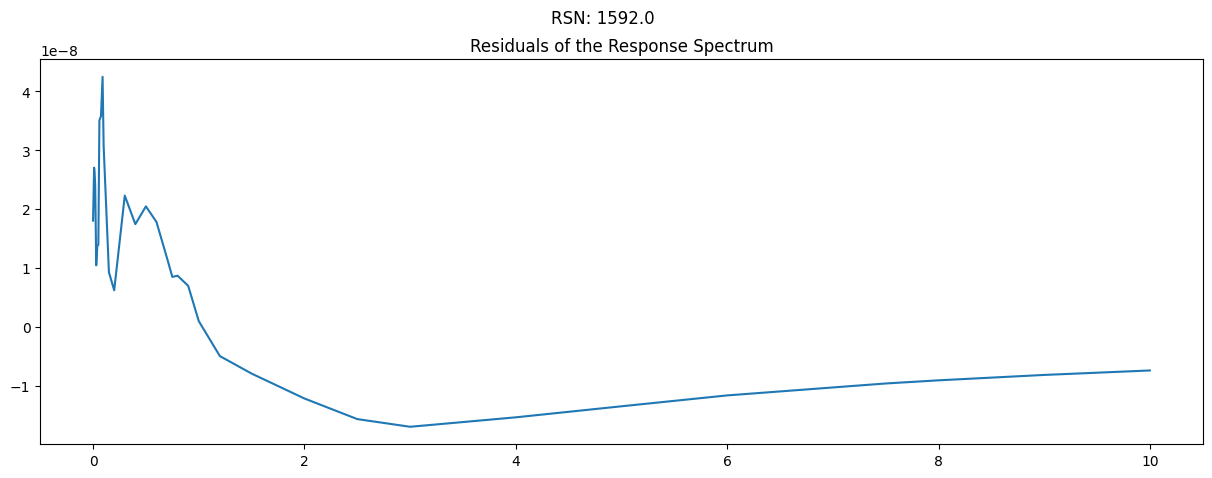

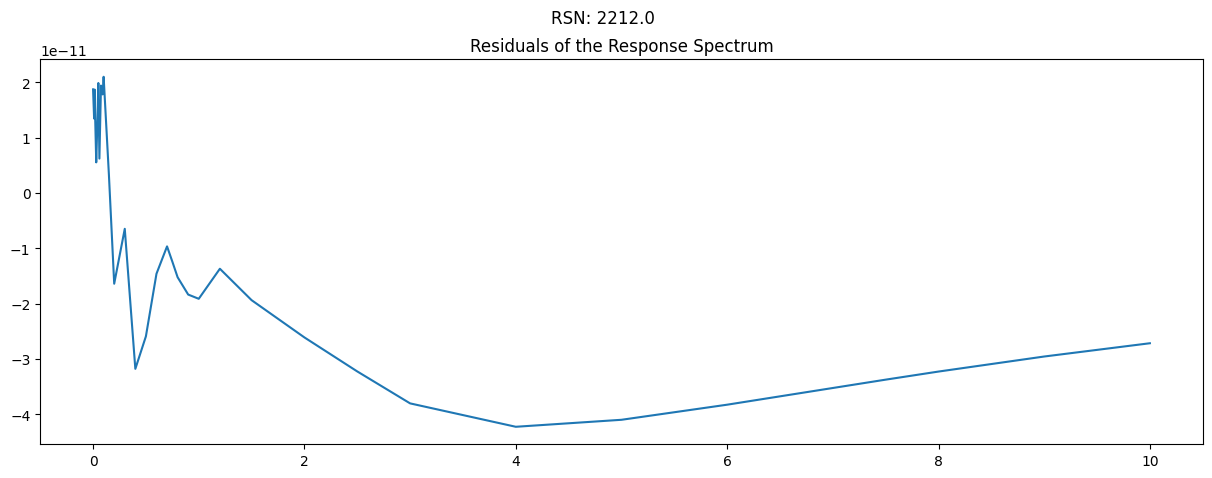

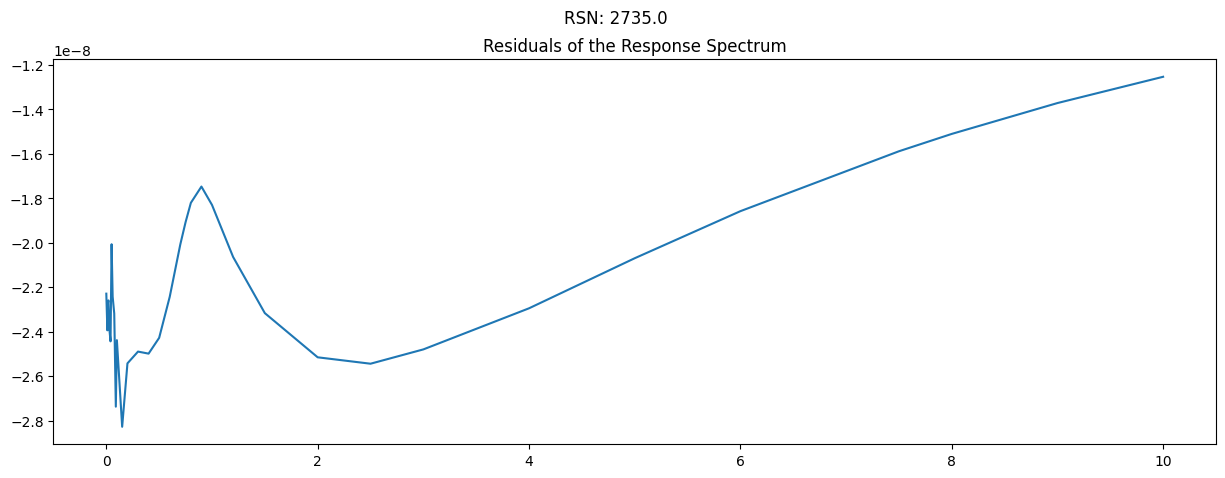

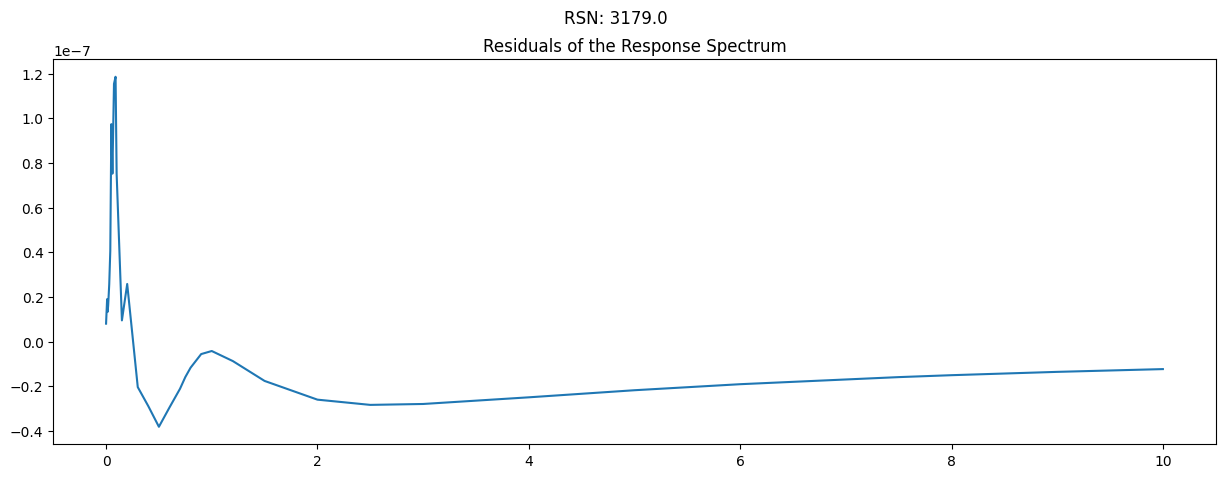

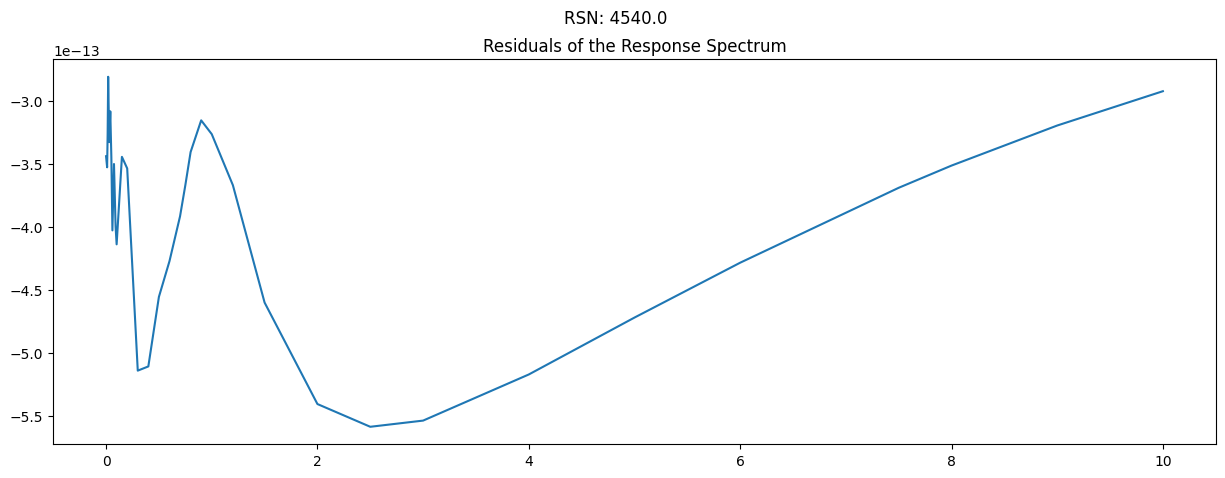

In [91]:
# calculating the residuals of the response spectrum
residuals_rs = []
for i in range(len(row_no)):
    residuals_rs.append(A_actual[i] - A_prediction[i])

# plotting the residuals of the response spectrum
for i in range(len(row_no)):
    fig, axs = plt.subplots(1, 1, figsize=(15, 5))
    axs.plot(T_actual[i], residuals_rs[i])
    axs.set_title('Residuals of the Response Spectrum')
    plt.suptitle('RSN: '+str(row_no[i]))
    plt.show()
